In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import re
import string

from nltk.tokenize import TweetTokenizer

from spellchecker import SpellChecker

In [4]:
# Load data.
data = pd.read_csv("LocalData/SongData.csv")

In [3]:
data.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [6]:
# Methods for preprocessing. These methods
# are applied to the entire sentence.
def add_start_and_end_symbols(sentence):
    return ("<start> " + sentence + " <stop>")

def basic_cleaning(sentence):
    s = sentence.lower()
    s = s.replace("\n", " \n ")
    return s
   
def tokenize(s):
    s_list = [w for w in s.split(' ') if w.strip() != '' or w == '\n']      
    return s_list

In [6]:
# Clean the data
data['token'] = data['text'].apply(basic_cleaning)
data['token'] = data['token'].apply(tokenize)

In [17]:
data.head()

,artist,song,link,text,token,clean
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd...","[look, at, her, face, it, s, a, wonderful, fac...",look at her face it s a wonderful face \n an...
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl...","[take, it, easy, with, me, please, \n, touch, ...",take it easy with me please \n touch me gent...
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...,"[i, ll, never, know, why, i, had, to, go, \n, ...",i ll never know why i had to go \n why i had ...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...,"[making, somebody, happy, is, a, question, of,...",making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...,"[making, somebody, happy, is, a, question, of,...",making somebody happy is a question of give an...


TweetTokenizer was chosen due to its description of being "designed to be flexible and easy to adapt to new domains and tasks".

In [8]:
# Let us investigate how many words there are in the corpus.
# Let's split everything into tokens and count unique words.
text = data['token'].values
tokens = []
for song in text:
    tokens.extend(song)

word_total = len(tokens)

tokens = list(set(tokens))

In [9]:
print("Total number of words: ", word_total)
print("Number of unique tokens: ", len(tokens))

Total number of words:  15023449
Number of unique tokens:  172869


Let's investigate some of the unknown words in this vocabulary.

In [8]:
spell = SpellChecker()

In [ ]:
unknown = spell.unknown(tokens)

In [11]:
print("Number of unknown words: ", len(unknown))
for word in unknown:
    print(word)

Number of unknown words:  131858
fluence,
there'sa
evil"
stood.
nitrogena
wake.
held!)
saram
nashville,
fackin'
fakin'!
jigga's
bodyguard,
marketplace,
favourits
birdies,
acts?
veines
temp'rance
[student
(21st
rear,
aroudn
feelinside
(stressin
i...was
alahhh
effort's
she:
g-off
bitting
sneeze,
ook
or-gy,
(being
ay-yi-yi!
super-sizing
nini
before")
?"
mujigae
(chorus)buzz
ashtray!
glorious.
bathwater's
hymie...
be-e-a-g-g-are-e-s-s-i-v-e
saw...he
lagrima
vinyl?
master"s
fly!!!...
(thy
hy
gwireul
beloj
kalbu
noomy!
saint's
exceptional,
restaurant?
chiseling,
undertow.
(deck,
love...is
flies,
[???]
vivre
doo-dah
chinchilla,
bellied,
[chorus(x2)]
slaves...
kalapating
beast!!!
yellin
layne,
come's
pipin
jalaaye
commas,
(niall:
yeux,
highlife
berdiri
waverley,
becaue
survival.
unions,
kawliga
blaeht
tattooos
braccio,
sincere-o
non-believers.
matter's
glug"
still...go
chorus(rpt
now-
rendez
x8]
credential,
rashed
nazalti
'32
mama'
knee-pants
heavyyour
hosanna,
bagiya
latifa
vaccine,
lonely,
h

toraeru
kreme
louded
farmer]
(christ)
ganyan
tangoing
encore,
decend
robbers,
smutting
(shoo-booh-bop-du-weh)
heaven)
sleigh.
bruh
movendi
shootin
babbayyy
a-washin'
touchin',
thunderball.
finers
threes,
buio
chick...
courtyard,
boooooooooooooooo.
mmmmm
elevating,
clean)
potassium,
penindas
corda
stat.
(c)kitchen
mule,
frisco
plead,
loathing,
ma-ia-hii
it'd
d'amore...
(ii)..too
confession.
(chocolate
ammo!
said,
gruntin',
fevers"
missing?"
tamlaine
chyna
(gunshot)
spago
model-actress
rustles
skee-o
land.)
pikit
polow
"me,
nursin'
paghyeobeorin
docter
mirror)
recants
eh?
mill]
lather,
pu'd
hm.....you
lumps,
habits.
latifah]
dogg.)
wipers)
downpression
scandlizin'
rodder's
what!)
pro-mack.)
low-riding
it'sjust
poppy...
revalations
roughenin'
backless,
surelt
i,face
bruiser,
cherry-faced
want?
(attack
whan
tag's
mimosa,
(turning
nammin
loves'
twidle-de-dee
longing?
plaaaace
chutzpah,
desires.
blossomed,
an-dey
"bye-ee!"
-responsibility-
lungkot
ex-cheerleader
marilyn,
levi's,
scenario,
os

gooooooooooo......
mac-90
sho!
socrates,
(g)no
homestead.
moochin'
ambiguality
poorboys
cheama
dank,
elves.
tree...
cuh
?muchas
mad"!
banister,
changin
speed,
cruce
dressa
pickin',
poo,
melodrama"
rocket-burst
radios]
jerk-uh
man"?
camaros
(what')
teacup,
'mama
(wo
mickey's
music...playin'
seems,
gunna
wise...
s-s-s-s-ittin'
cooper's
unimpressed,
tina:
buncht-up
mistletoes
beast:
rhinosaurus.
paeople,
lamang
blingbling
tobes
scolding,
nagatoyo
homesick,
kinailangang
parker)
zoo!
noem
(goin')
uppa-up
niet
c'mon.
qu'ai
three-eighty
,3,
desdenova,
i'ma,
beckoning...
be?-
all'll
badu
hold-a
century,
sic,
kirei
squealer
acheved,
(beat
shooked
riddling
time.....
ganji
wagon.
minces
beatlemania
k-o
graze.
kil-la
earthquake,
deducts,
stonies
collector,
heats,
-sides
pleasant?
(bluer
rockathon
wrayer,
six-shooter
(slamming)
jhutha
burr!
nipsey
time--
anais
oh-so-familar
prize"
yaman
6th
fellin'
reagge
deliver?
outside.
bee.)
firyres
lady-oh,
snoozin',
[oh..]
amanto
arc,
natural,
leaf?
beaming?


"foolish
passions,
wobble,
epidermoty
suteta
yet,"
'gator,
[bekhyun]
sailors.]
psycotik,
radio?
woman--i
shoe)
d-d-d-danger
confusing?
gwitgae
wein-nur
landslide?
my.)
centers!
(trouble,
siamese,
haps
lust-thou
intelligent,
exceptions,
compos
less.
impolitely.
why-y-y,
believe!"
disillusion,
[lloyd]
5-0-4
a'sailin
rood'n'doodee,
lord's.
fits,
ahshar
fruitjar.
superglue,
gentlement
grown,
genes,
subdued,
shashin
letzte
nuthing
frink,
lulla,
i.m.p.
state...
vacancy)
a-stealing
hit!
("direct
(hey,
exorcet
lata,
"war
(sacrificed
grim,
(trombone)
theme,
behinde
then!
every)
"amen,
family.
crusades...
indestructible,
jamie-o
sterft
hollygrove
wisconsin)
geniva
("that
fort,
crawny
permenant.
(reverend,
sandy.
somatta
school"
ayy,
eternally?
final.
terhanyut
doodlin
devenshire
earth!
sleep.
bree
(everyone)
intention's
(halo
me(know
shocking,
leary's
fifteen.
way!)
ungood.
baaaaaad
might'a
lanes)
ryan:
beat!)
hunches,
think:
asleepin',
party...
land."
seten'
beautiul
sat,
suppose"
unprayed
reve

burgundy.
breedy
vuur?
unkle
harm?
?lord,
personnes
mean't
shangro
"dree-ee-ee-ee-ee-"
sadness,
brille
growed
split!
butter,
scallywags
loseyour
(dance),
vibin'
a-heh,
big-nosed
cryogenic-wise
merry-oh,
a-skating
their'
impertinence,
lp,
door)
you,how
aher
neol
spiralin'
coveting-thou
lo-lo-look
"cain,
wrought?
adlibing
discovery.
canary,
stilllll.....
[amidst
sugar-sweet,
whoa-ohs
bed'
tar)
motherf-cking
bompy
panpipes
rang)
(84
boond
nooooooooooooaooooohohoh
(there
ever'thing
lifeless.
heartbeat.
reggae,
elevates-vates,
furtado)
[shanell]
"lairs,"
you-oo.
ism,
rangoon.
terminal's
what-if
vivis
taralets
(go'on
scary)
fagot's
applause-plause,
beon
mercury!!
melt.
wa...
sl,
backround]
class-
armies'
7-1-3,
star-dazed
"half
bunkheads
entarouge,
fontella,
care),
doofenshmirtz:
handy,
dumbing,
dro'
([mumbling:]
driver's
cry-i-ing
brama,
revelator
winging.
musicians,
runnning
bright-
thick,
rarebell
strength's
[ciara]
benatar
mcloud
static"
goody-two-shoes
saturn.
cow:
chatting,
loo-rah
met

creation,
(amazing,
anche
oh-ho.
proposition,
tristeza
forty-three,
be.....................strong)
hadda
a-snootchin'
maaama,
wildfires
control..
girlies'
sniff,
curve--i
tus
quimica
stance.
"block
light-years,
bak
primate,
dirty's
ohohoh
stake!
stardust,
magkaibigan
limbed
diff'
reigns?
(jed)
size!
aboard"
brighten,
5x]
blaaaa!
kupie
mathers?
"sam,
begin'
happy,
hola!
unclose
electrocutes
plants.
says...(hee-eere's
"dreams,
s-s-s-something
passports,
hussein,
tucker,
yeah...she's
arrive,
lifeguard,
beeper!yo
"earnest"
dranking
youknowhati'msayin'?
awhirl-whirly.
glomorous
monkey's
listens.
(c)singers
glitter's
panteth
freeway.
masakyan
cuervo,
standje
jerks,
calli
mother?!
law.
matter.
mass:
baget
chino,
nitidi.
apartment)
delights,
bear?
m-m-mumbling
relf
stickin'
jillion
unibrow,
soggiorno
mura
arcade.
gash)
foldin
attacks,
bu-bu-bu
wic
romey
turn"
wooh
needin
sec,
becareful,
adabra
geudaen
go,'
look.'
startec
dicaprio
(so-called)
anomalous,
(maurice
'cos
know...well
tallapoosa
insi

undress,
truth:
elase,
you...there
hole.
telphone
unsteady,
huarachi
babito
calliope
shaboach
croonin'
(lorrie
think?,
7-27-42
muh'fucka's
tray?
involved,
shifts,
daddy...i'm
apears
"stars
("fall!")
prosnetsia
me...never
(sisters)
trafen
instante
seolah
dipundak
triumphantes
horizon...
tsuzuki
flying,freedom
gorgeous...gorgeous
wunderbar,
concealin',
plucky,
g-shock.
home',
remain.
dick?)
tim..
snizza
ja-
teetotum
(linden)
'o'
chargin
simultaneous,
tempat
soar...
a-sway
louisianan-uptown
inherit.
amae
jokers,jokers,jokers
kaliyaan
agree"
gas)
jack-jack-jack
ashes.
oh-oh-e-oh-oh-oh
heavyweight,
skip,
shakin'and
speakerboxxx"
sleepyhead,
heeft.
moisturizing
beasty
county"
23a,
ikot
material,
a-a-ate
chrome,
llight
(persuasion)
preacheth
(darlin')...
malgo
photo-fobia,
mecum,
nominai
just....little
su-su-summertime,
bridgette
bomb...
inebriation
and're
mumblin',
that..i
machine'll
ganeunde
boogied
bless'd
plonger
heeonaol
mothafuckin
overstand,
human's
budlight
x11]
7:00am
quietly!
inyo..

yeh-hey-hey-hey-hey.
oooh(repeat
schooly
dashin'
consequence.
poetry"
ghanghor
fan...golden
bilko
shiver-men
nesharim
knelled
scrill'
goodbye-ye,
jedo
chi-town
(bobby
blubba,
chacing
dut)
finder's
"people
below"
rulr
rain's,
fon't
runs,
"thousand-and-one"
berseri
le-'aba,
due,
incartinated
rapier.
boarding,
idalis
die(2x)
rod,
rude.
(girls)
religios
culprit's
hannah,
fever'.
koresh...was
sane?
stonework.
deuodenum)
"invest
amon...
there-ooh,you
calisthetics
happenin'"
seventies.
i'm)
sorrowing,
wear"
youuuuuu
kamalayan
someimes
horns)
p's?
yessir
lagers,
this)
ex-girl-lah
back:
g'
park..
(to,
uns,
tent?
[cleveland:]
shaschige
bonjour!
thundercloud.
a-mornin',
coastin',
him,to
mirrors,
di-ie
kumbang
("there
jamaika,
pound,
am...the
no-fuckin'-body
sorry...".
subdivide.
say--don't
break.
confessin?
takeout
saracen's
grids?
memories?
wunderbar
chick!
persistent,
hurt,
letters.
judd,
v.i.ps
lug,
monument.
august...
'deed
storch,
[man]:
thailand,
froggystyle
only!
ta,
ahhh-ahhh-ahhh-ahhh-ah

carrotene
raps--"support
neptachat
galit
hip-dance
dem)
handang
bonnies
(they'se
(sabes
benzedrine
reveries,
brownstone,
mnop(monopoly)
(jimmie
flage,
(pay
slogging]
honies
tayung
sharecropped
anton'
rule.
apartment!"
door......
simping
wah-ah-aahh!
(pictures
haciendo
20k
tko
'our
pitty
o-on?
steed.
eymah
believe(yeah)
broken?
entertainment.
yoah
trol,
dogs!"
snogs
implausible'
galoot
baduba-ba
pullin'
door!"
gogo
furetai
apocalypse!
maitutuwid
no-bo-dy
kahapon)
slo
joke)
ooooooooooohhh
marcus,
lamborghinis,
mij
proceeding,
10"
farewell,
truth's
cosette!
(ha-ha)lets
(ch-ch-ch-ch-ch-ch
momma!
apart..
dc:
you'll
chiquita
imagine:
ephedrine
relic"
defined,
"no".
hya.
athlete,
[eightball]
'06
floor)
polish.
hailie's
mouses,
hunchback,
bring.)
sailors:
kegged
s'embrassent
k-bar
hour,ev'ry
specialmente
numerology,
tumibok
sideboard,
stateam
(lp)
(baby's
is-uh
mind,
seams.
flambastic
forming.
poise,
roko
wakuwaku
raining)
wearing.
waddup
specialty!
1982)
sharpies
timmy's
billy,
society...
elo

moonstruck
someday...hey,
[loser]
noxema
will",
cry.)
renee,
concerts.
rock-mobile
clocklock
norrogitive
harmonies,
protesting,
poor'
fireman's
pret-ty
australia's
camps.
da's
sandpaper,
(pal.)
hand.
objects,
juma
speak)
spanky
sheila,
alirkan
steven!
correction,
ooh-ah-ah-ah-ah-ah,
bright!
hard-hats,
seagulls,
midnights
bullet)
a-fire
goldmind
tomorrow...
raasta
stocking.
end?!
here.
3:(drake)
dayturn
lotus!
honey?
drunks]
cassiel?
this.)
a-one
t-birds,
gums.
stage"
flinstones!
tiles.
[chorus
prenup,
kegels
alive.
bangin
renewd
shablamidi,
mo....
(worst)
hard-
wante-ed,
deep:
(enter
aroof!
bud.
chan,
oldielyrics.com
polo,
taster's
roaster
sh'chorot
bickered
butterflies,
babyboy
businesswoman,
[ghostface
naw)
yaddayadda,
am-machine
mentality,
(crank
"never,
ram-sack,
spoken.
ditty,
ladder.
da...
know:
(del
beads...
fingers.
ya.)
teen.
lousianna
abigail's
jungles,
radio-oh
barbeque",
sake,
releasein'
whatchamacallit,
cubit-cubitan
follows,
chours
way?.
villain?
pensando
lilywhite
far...

buhay,
fingernails,
moment.
(icp
guilty.
grembi
that's
slither)
mieillers
wanderin',
deserved.
sendiri
hon,
james:
antone's
knights,
sense...)
shovers
enboddas
"move
deliver"
nostri
ring-a-ling
semesters
jamica
spiderman.
ledeth
sphinx?
(ricochet)
sam:
coomputer
cintamu
antarctican
hairdresser's
stomp.
pocus
dauphin's
[z-ro]
cutes,
dyin?,
guit
achilles'
lead,
disappointing."
retox
shoop)
alone."
'98
passionate?
o'-clock
.....god
you,nor
batlefield
i.d,
quid,
oh,)
(sugar).
this"]
salty,
ma-mama,
compare,
a-tinging
indead
principle,
bruisers,
joke...
frost.
renacence
anymore,she'll
self-believe
twizzlers
run...
cagney,
leanie
himm
hlding
old,
afternoons,
shoeblack
allow,
[fortune]
woah-oh
paranoia's
ma-ma-ma-ma-ma
searing,
[chris'
siren's
straw,
boldly:
cmr,
sharpay:
luckless,
[ghostface]
lo-lo
pow'r",
lover-lover
mahama.
oaxaca
wehren
hell-cat,
park"
flipper,
hungrig
sahabat
bust?
sheiling
shrinker
outside-first
jeonyulsikin
irathamadental
here'.
pharmacist's
roc's
admission,
chaleur
[s

prison.
amerigo,
mark's
kin!"
blue?
bred,
dominick!
hood'll
bayless
paint)
(losin'
four-fifth
whanted
oo-oo-oo
refuse.
hiney,
jammed,
fabora,
luck?
fuckin...
pocohantas
damnit
arnold,
kicked,
cimmie
3-way,
turnstile,
sportsters
t-t-t-t-treat
giardina,
real'
tayo
amarantine
sincerely)
nick-i'm
before,i
truckhe
mindthere's
soneul
yes,the
suppertime"
by-tor,
boyzone
8-hour
palce
fuckin
taadow!)
master?s
(hidehidehideho)
fable,
(lum
d-d-d-do
rhymes]
down...when
r.i.p.,
da-da-da-da-da
shijag
[veronica]:
fun..
ribbon's
coupe-ish
sulton
tom's
us?"
slooshy
ah-yeah
paper-weight
there?s
logo,
m-v-p,
upheaval!
maha-ui
typin'
day-ay-eee-ay
reli
whoopee!
,the
muleskinners
ever-more,
crazy-kitten
[ring
insane...
carrols
igloos
(limbo)
ail,
are?
hour'
its.
self-destructin'
junglers
splurging'
blotter,
indecisive,
26's.
panfulls(?)
oo-hoo-hoo-oo-oo
wolf-an
pinballs
boogaloo.
trillin
cube'll
slept,
flava'
bradley]
notebooks?
k'cho
then)
a-that?
divy
mother-lovin'
hummel:
hageshem
[trey
e-p
rounds.
bang

jigga
o-wo-o-ho
orphan...
blissfulness,
purses,
'96,
blooming,slowly
(27
man-a-tease
'ice
capacorn
smarts!
calories)
[hands]
reason...no
tba
people-phobically
thief,
so-a
straight!)
neptune,
bounce,
batter!"
[echo-trey
lookers,
jewels,
alone...
lexus,
scandium
bawah
back.....
gerald.
reprocussions,
necesites
bvalgari!
alibied
''just
diabolus
durrough
gun-play
relaxin,
backs!
5'9'
(breakers
(oh-way-oh,
chief'
veins,
thrill!
(risin')
jiljureul
canadian,)
sun'ss
pealed
yeah-eah-eah-eah
aurait
conceivable)
satch,
goombah
3"
torture...follows
(drop
death)
younger?
special?
cube?
lord,
nababalik
whyyyyyy
track...
(huuuh)get
celebration,
policy.
motorhead:
meeny
postiau
s-atinga
angeles)
become.
crimes,
stacey,
hoga
atlas,
(c)goin
yp
gown'll
joness
o-you-t
mudslinging
weise
"pebbles?
pie-faced
betza'ar
witchu?
(you're),
steak.
uncle!
unbending,
(breathing)
blow)
discolourations,
trouble--that's
slobber
equality,
[chorus](repeat)
sample]
'why,
veterinarian,
cherokee,
nerdy"
(dinah
nutshells
st

wonderin
nina?
exploitin'
nur,
(9,
stakes,
disick
adrian,
slaw.
pokus,
yored
ganyan,
nag-aaway
maine.
gashed,
tenderness"
w-2
"si
monk-heart
walliflowers
consience
allah,
demo)
moonshine.
conceding,
din,
[mya]
blunt..bet
dissector,a
grapefruit,
curve,
(lovers,
inaamin
see,"
mateless
busked
josephine.well
suha,
aside?
six-five
dayin'
guessing,
brady's
beginning.
tarse
o-la-te-do-da-la
page'n'stufft
mutts
dugeundugeun
go?-
indulgence?
complaint,
medi-cine
everybodys
shut.
arroyos
feeds,
yasitech
head(losing
"dammit
ataerareru
fawcett,
hawaiin
nais,
found",
country-western
mist.
out-law
chug-chug
scream'
contenter
saw-bones
vibes,
me....around
co-sign
reconsider,
ooo-ooo-whee!
jiggers
aand
true).
influence.
claimers
wappa
rockin')
12'
democracy.
liberti'
butt"
lagaakar
guevara's
wthout
(sylvia,
shaddai,
standing,
yeeeeeeeah
grader's
girls)
a-nearly
"chincherinchee!"
babaloo
resortin'
pedestal,
surrender!
said,"baby,
petersson)
pardo
o'oh,
know-that
brota
coughs,
fa-la-la-la-lah,
reflectin

[king]
maddona
personnel?
flambino.
treasure.
marked?
lived.
me...)
vamps
gristles
jajonshim
binti
chuggin'
railroads,
contamination,
mood...
anyway)
(waiting
detonation,
combed,
supportin'
she's)
wintour,
buhay
twenty-one,
misedu'
udaas
armoire
(anyone)
loud...
too-
devils!"
fano
ooh.........
ahahahaha
wherewithal.
precios
boundle,
(background)
noises,
redheads...
break?)
weird.
a-rumbling
persons,
malkeinu
home,see
lopez,
baby?i
walk'n'cry!
suck'm
untidy,
(rough)
love's,
sisco
walkin's
stank,
sahme
fleas.
makin'all
drac's
hipping
jeane...
vise!
scotia,
tannis
figtin'
carillo's
ascending?
glamorize
ngayon)
reaching.
awwwh
bip,
imasara
dovrebbe
ooohhh-ooohhh-ooohhh,
balming
stridin'
shakbatina
try]
too,
.....the
krabby,
(isabella)
(shit,
knocked-out,
sleves
twisted)
fine?)
negril
baya
angelia
rutine.
claming
setetes
burns.
pagbitiw
genie's
hooks,
coolambindang
jigga,
sean.
rivers:]
embrade
mineway
veux
frga
misbehave?
bof
flarin',
elutions
conflict,
vents,
[johnson
be!"
waaaaaave
alki-

(gladsome
minute's
chick,
zootin'
pinholes
a-tying
ge'n
sandworms
wady
worry'
agos
pard
goosebumps
all've
doucement
impression"
utsuroii
machinery...
pipes...
(oooooooo
crastination
score?
ehar
awayone
"slow,
anyday,
pene,
wohw,
'inside
(sometime)
wahr'
motivation?)
nabulag
tastin'
mac'll
grandpops
dis-conclusion
"timber,
dunnes.
betides
gouldman.
pestilenting
warrabrook
terrestrial.
bon-viveur
squadren,
fackin',
written.
papers(papers),
dissillusioned
oh-ah-oh-oh
naire
x2-
me,i'm
oyu
dallas...catch
eysh
skyscrapers,
konjou
denver's
i.....mmmmmmm
campanitas
garrett's
otherworldly.
handkerchiefs,
go.....
eah,
(4th
pedastool
plagued,
(sad,
despaire
pangkuanmu
brownie,
store..
now)!
(too)
called,
shirted
(kinda
a-diggin'
friskin'
lamig
rain:
trounsha,
son...
shotgun,
mar'
harlow,
kiss"
yello'
senators.
oy!
insincere.
'010
dupa
firelight,
whipser
waste]
third,
parting,
shiness
recline.
slobbed
unflawed
wastin
fematic,
situ
friends...i
to'y
straighted
untrue,
stupefying
backdoor)
m'ha
cozen

lafayetes
an,
nazz
follow-follow,
swivelly
mamita
brandy,
piliin
reload,
(danja
bettis)
colder?
cerium
(vraiment
romelody
daisies...
see-74,
properly.
yowai
called"
splitting,
eongttunghan
want's
palayo
a6out
stress)
(andre
grinner
'doc'
now'
movado,
gaston!
shed's
porbey
mess!
(treated
oceans,
c.gray)
hemp?)
teased.
telephone?)
salute,
york.
richies,
(incoherent
motherfcuker
piru
aznavour
theme]
own,
serials?
(ties
fogs,
schlaft,
kindness.
drug's
dealin',
couple'll
cooper,
novelty,
lately,
l-l-love
hem.
reach:
bo'
balihaari
dewe
tombs"),
birds"
170)
walkaway
1-2-3-4,
2045,
opening]
pleasant.
[kai]
towardz
puffed,
wreck,
defintly
pot-belly
humpin
venice,
cocunut
vessel,
twitch,
leve
habari
kitty.
gun?"
dosey
etro
classified-
omoidasu
rumore
knockin',
(man.)
vada.
runt?
fuse'
baboker
a-afraid
place?")
armchair,
non-conformer
darkman's
nakatali
penny.
[juvenile]
morbid,
siditty
i'm.
bounds.
eva,
mitlahet
scarcity,
anythins
cambered
maybe?
hell-house
jet-jet-jet
yeah..)
takkan
carpetbag
a

reprisal-
nickle-dime
1-it's
drag)
dogs...
rotzen
finding,
splinted!
honery
obsceno
reoccur
whoa-whoa-oh-oh-
chore,
band!"
cries).
gpz
natty..
mmm-
bedt
mahulog
proche
pregar
invade"
naring
snackin'
saditty
seeimg
leaving',
friend...yeah
(ha-ha)
(jerry
?.
a-half
there.....
morolda)
a-heading
heart-break
shing-a-ling-a-ling
sister.
(day
prunes.
dudes)
listen"
goderhead
aansoo
lully,
herbsman
fight!
[diddy
loony!
blocker,
soldier)
redit
grits.
dake
g-gangsta,
vanilla,
irre-
miels
lurid,
monkey-ass
talk's
napapansin
brillante
maggie-may
reappeared.
bandana,took
ideas...
beses,
destructors
"diamond
he'
scheiden:
double...
hustlin',
kyozou
ancient.
babababababababababababababa...
treat?"
eleyson
things've
hamechatim:
ridu
made"
maiorita
man,
hemaeineun
x5
my-
sunsuit
(brave)
swim.
city-street
roadbut
diem's
baba's
quintessence.
straddeling
zigged
ball...
up")
ticks,
indigo)
tenderness...yeah
though",
loco,
toci,
cafe"
(l,
worth!
along...
gorirur
tomarrow,
hear-that's
self-assured,
sheela
u-

rhinotropic
beatstreet
we-will
judas...judas
city-
angeles.
dreams...not
second?
'pac
"casey
ligo
boiji
lalalalalala...lalalalalaaa
bodys
b.i.
rugfalling
black-face
swagger-ific
bumalik
then,"
detective.
nylons,
wiggity
"total
immenso,
tac-tac-tacin'
ooh-ooh-ooh,
tumilapon
seconds.
quarashi
pick-a-myself
we're
steet
me'ayem
ride)
spouting'
ya?)
'stead
fazia:
leadbelly
vally
field...
vites
raido
essentially,
yaka
"southland"
ludda
toker
enterd
contender...
sunflower,
foxhole,
"see",
invitation's
du-wop
dhadake
tamimah
here.')
womanto
wae
nagdidimlang
dog's,
aohhh
brakemen
(yessir)
chil'
suspicions,
ultraviolet...
miake
appear'd
tragicomedy
thorazine
yore.
pool's
extreme.
toolin'
landscapist
darlin'?
ghost...
wind-up.
identikits
waxing,
significance,
lotta-gita-do
(shall
racing,
richard]
shoo-op)
trillon
bidly
mm-ee-mm
chill.
sigla,
mysterious,
outdated,
infinty
clue!
approaching,
clubhouse.
spain?
run'cause
woowoowoo,
spread.
time).
steno
nik,
affair?
self-ordained
mockingbirds
yeah-e-y

badman.
[slimm]
taught)
nowwww..
makatotohanan
treausre
chungking
"leda
street]
romanticize
blu-ues.
revolted,
zippindale
bone!
(i'd-lie-here)
are."
stay?"
thicker,
beeotch
genie,
(except
buhangin.....
(ohhhhhhh
sufferer,
"discreet"
anybody...ever
streisand]
too?.
thw
koe
own(on
wee-ooo
thirty's
sittin'.
cherry's
malamyos
deepcut,
4:]
sumthin
lyte]
darnedest
atatakai
black-night.
it',
do-do-do-do-do
hush(whoa)
portmento
that)
shizuka
(if)
monty's
wanton,
(degeneration
noche!
saltamus
fifi,
deniro
buying?
kudus
toast."
glo-glo-gloria
jumpstart
trunk)
awayyy.
[long]
carry...
nicki,
ox's
(hug
comprend
code,
[yeah],
me!)i'm
dean,
treadin'
cairo,
governments,
scandal,tax
(let's)
gray-haired
plank,
more!",
ac.guitar
stay-in
desecrator
greshin
darkness"
waves...
cuze
teshonda
"sittin'
up:
1-drake]
finietur
paralyzed.
mud.
snack.
masvidal]
scaramouch
bleed.'
baby-you
(magic
(mmm)
cheaps
emaculate
faceded,
(bang)
screws"
mason's
are),
epeat
valance,
tempo,
peelin'
bay-ee-a-by
digress,
excused,


stripping,
by....
uncheckable,
angelenos
ohhhohhohhhoh
buck-bye
fe-fi-for-fum,
ues
kwa-li
siguen
storms.
glow!
be,
i'n'i
faulkners
ahh-haa
engage,
flu?
pusha
hatin,
atheistic)
aozora
leave.
pwayaw
inhibition's
toughed
lackeys'
ecstasy.
tarnished,
perfumes,
bongin
isipan
babbette,
maltshop
upand
matwala
lambourghini
stirs..
did"
7h
abbracciai
hearse.
formation,
uuh
silhou-
jidhar
nicholas:
vacation?
daforce,
(weezy
comedy.
marlene,
maserati,
ya,to
hi-ya
fadeout]
(rollercoaster,
independent?
minumutya,
kombucha
callagh
groveling
'dial
deuce,
retainer,
edge,
media,
poof,
point.
cercando
awaywell
barsaaja
degeneration,
birthright.
'daddy'
grapefruit.
m.o.n.e.y
(buck
gloves,
destinty.
mitternacht,
mwa,
daps,
[swizz
ahhhhhhhhhhhh
polycarpou
eli,
blakah,
gusta
came"
volersi
dolcezze
j'vais
wanderer,
(car,
(song,
tis'
screw...
cent]
wanda,
knee-hole
joseph's
solitary,
trice]
j-a-zed
exaltations,
bizugs
watching?"
(january)
excusez-moi,
heat's
myself]
yeeuum!
aaahhhh
elektrischer
middle-childre

birds.
property.
inverno
unbroken,
nut"
spreadin',
ilheoga
horrorscope...
killahead
saft,
perfume?
nebunele
pocket.
sheena's
rawhide!
wee-ooh-ooh
gapin'
bows,
tomorrow's.
'drumshanbo
size?
blaileen
life(i
nypd
lie!
gone!!!!!
gift."
noises)
"sign
raaaaaaaaagedddddddddy
bu-ut
circum
while?"
deejay
infection?
duz
nah.
(wishin')
franic
thoughtfuless
spilling,
gale,
wrasslin'
satge"
republic,
which)
sancto,
finn's
(at)
oohh...oohh...oohh
emojis,
specific.
gom
yoddle-ay
trouper,
pooty
ridda
hardhat
li-ie-ies,
blessed,
real...so
g-men,
gentlemen?
sani-flush
(rants
fling"
insincerity.
yeah...turn
marajwo,
next,
(nah!)
(ehhhh,
hubbard,
"stranger,
ratin's
streams.
honi
halvanah
inc.).
tincel
forty-acres,
hih
peni
windup
jellicoe,
airmata
jim's
ahhh!!
lassos
octive
wasureta
sun-burned
missin'
knots,
akof
leblon
kushi
scorn?
jackanapes
vict-ory
cant)
fudda
seizures.
spoon.
makivelli
refrain.
mancow's
friend.(4x)
feel...
juanito,
strong'
khomeinis'
performed,
look:
blandest
(quietly)
animal,
loads.

s.w.a.t.s,
heavenly!
mommy"
dance"
d?...
llorado
begged...
tongues,
system"?
l'amour.
tylenol,
clinger
bum-bumpin'
faaaaaaar
mothafucker
1:15
gethsemane,
spindel:]
hoh...
objection's
bra-strap
else....
jackfrost
d-r-e
aliyah's
ahmoon
dehydrated?
(nice,
charished
boodalay
tali
spirt's
tarp
ira,
juggalo
"truce
jerkey!
laughing]
yi-yi-yi-yi-yi
"two
echo)
("everything
powercut
many's
looked...
drop"
(baby
said,"hold
mm-mm-mm-m'mm-mm
corks,
ceased!
un-harmful
motown...from
nuta
696,
toil,
dander
'cos,
yodeler,
democracy?
"i'ma
japes
hosi'ani
???two
fezewig's
senggol-senggolan...
assassing,
sote,
likshor
rousseau's
31st
llw,
stumbeling
shrimp,
resonable
disturb.
(lingers
loathin'
nanay
bed.
splints,
inside-you're
crime:
nomore
'beware
(sisyphus)
obedient,
liam:
really?)
tragically,
p.m.,
gentlemen,
be...i'll
polka,
c-o
pizzas?
whispering?
compartment's
katulad
snakedance
lucky?
berretta
a-worth
question...of
feller,
lacci
impression?)
insolent,
(holla)
"gili,
goat-tee
mi-i-ine
(hello).
(part

maintained.
bleu.
levana
c-p-t,
malang
stillsuit
translation:
spring!
hoshigatte
scum-bags
gardiners
blitzen.
gesicht
marquee,
lopa
(i'll)
grata!
harnburg)
meatstick!!
virtue.
regalia'd
spot,
baby...forever
(victorious)
beamer,like
vaise
iiwan
sizzle,
outside-to
palomar,
profound.
bart)
yetzutz
cargo's
released?
vah
(money)
y'knahmtalkinbout?
straight-jacket
ta'aroch
kkojibeobwa
(repead
flowers,
rva
boonierat
objectively,
(rockin
misbehaving,
boba
sidha-sada
kucing
semi-aquatic
yout
unafraid,
(bom,
tryina'
vice?
gabrielle,
d.a.
elegria
drool!
bubble-headed-bleach-blond
dakareta
tempo.
(world...)
anja
tulips,
nothingness"
(be-bop.
stallion!
ettes
boyeo
ma'fuckin'
(it'll
package,
'scuse
agenda.
(okay)
(chicka-boom,
snap!
tudors.
athlete's
ripenso
spackle,
tai.
dance!
betsinat
[f]
shountin'
(grab
phooey,
roar-
amuse.
fwsog,
d'histoires
offa'
stan,
paalam
grandfather,
halfway...
impressions,
pawis
domine"
girder,
constellation?
reinvention
horney
(lea)
nawdle
[seunga]
napapaamo
charcoals
c

chi-na
tomtom
motors'
caltrim
habit)
socializin'
1:09
relo-oa-de-ed,
dundun
seeting
schoolbus
notice)
tojolobal,
rolling'
syndicated,
chaperone.
guidence
wax,
headrush
dancing?s
skillet,
icon-stat
'taters
ivor,
rether
(hoo,
loon.
uthink
propella
honey-bunny.
spune-le,
hooked!
barbands
bidst
sumeobeorigo
yoodo
a.k's,
backflips,
gangsta-ass
now--you'll
pulung
thumping,
forbetten
(dyin',
name..was..icculus!!!!!
dunky
shaq
yeah-yi-yeah,
rollercoasting
ooo-old
sh-
whisper:
l'animo
overuled
negusa
nawf,
kazam
faddle!
tmz
eur!
keufs
ormai
t'aimer
persist,
a-mexico
tease?
automatic)
(attention)
jaw-jacka
smoothes
(christine)
hot?]
(fiery
calzone
heartborne
minerals,
501s
jesum
reignite
bent?
vincent's
simho
right,(it's
"shalom!"
answer!!
lied.
um!
(garage)
wears,
flo-uh
shooby-doobie
settle,
(easy)
mitzerah
breathin'!
extinction,
tang"
erection,
(q-tip)
"hullo?"
distortion,
hear?)
and..
(girl,
cod,
i'm
iyeza)
y:
maxico
emolicious,
t-m-z,
senioritas
hoofed,
(odl
plumet...]
awethu
mission?
haven

shinjite
sweat?
hiv.
tyres,
u.s.,
souls"
(one-two-three)
six-eighths
rearrange?
lazytown
beaver,
alrite
beatdown!
spell''
humadam
unending,
(hodehodehodehodehodehodeho)
dip."
shopping,
simplicity,
whatever),
while...yeah
pools.
bravo!
(bits
jang
jerk.
aliive
v'be'eneha
boilin'
lennon,
tilak
chrsitmas
eastaw
wheel,
expedit,
"eminem
weekends,
whirlpool,
behind!
"abigail
whenevers
maxin',
books-the
fuel.
twista,
ooooo..
stille
forbiden
situation...
cap-i-tan
geese,
nama'y
crumble,
killing."
(chea)
pugit
midnights.that
lilleth
19:29
object.
else."
doe-doe
loyalty's
forceps,
down!!!)
beauties!
tov!"
red-neck
s550,
blindfolded.
suks.
cured)
you...
clinometer
upon,
mumsy
haircut,
jell
yeaah!
verbo,
aalay
jism,
diameter:
everynow
worlds's
beds,
go-carts
whisperer
crazy-we
gomorah
bears"
rrd
jeonnal
(chee
(venus)
ya,...
widemissouri
(prey
soulfulness.
o?my
usual...
stump!
(know,
between...
me...i'm
t'effleurer
[harry:]
reply,
overal
poem,
ukarema
offset]
rea-ea-ea-ea-ea-eal
leaving-
(up,
genele

go?on
cuties
surpass,
namin'
m3:
toyed,
(round.)
ore-gin
sickless,
a-fallin',
1x)
(vocals,
haaan?
pahali
armour,
6acc
light!
unruly,
bullshit,
"ho,
corbis
lucretia,
listen..
parading,
fl-fl-flop
cowhands
imadi
(breakdown)
corvet
jedi,
louder.
turnpike's
"shet-ma-mouth"
heartless!
mongolian,
unsicher
thread)
bestill,
jumped.
fool.)
grade!)
(across
ooo-oo-oo
lyyyyyin'.
spender,
cracerbox
laffy
romantis
money?'
sunde
stranger.
soopfly,
inaawitan
jubilee's
good-bye!
achoo
g-boy
floors,
rachels
advice.
a-sun
'lone
maglaho
drawer.
schwarzgebrunt
sheik,
depends),
fearless...
(stealing
locomotion)
bumagyo,
reminiscence,
ahelei
fra-disco
wages?
spray!
alten
mentr'io
cinta
lands...
employee,
geechin'
sleepwalk!
weighing,
throwing,
cozi
howls,
lagati
notcied,
eeeelope
gottheworstseatontheplane!
desperation,
adunana-ne
jaw-dropping
candace:
artest
(sustains
boston,
behave...
kahirapang
what...?
completley
selena,
(ball
numpuk
earth.....
readymade,
shit...like
hitcher
mama-woman,
brownsville,
filli

weooooo!
i've...experienced
l'amour--marche
honking,
(ghetto)
snore,
mothey
wilin
days're
apple-loops
dou
inside...
go....
belly-gunner
?round
sha-shake
(doo,ooh,)
healthy?
walka-walka
(boo
nu-umbers
gutter,
reel,
(houdini!)
(higher)
beseter
home!"
s-d-p
mona?
uncaptured
d.o.g
mourn,
bills,
bahamamama
toronoto
you(if
sunset,
get'cha,
girls"
christine?"
darding,
holl
summertime's
dew?
love.............................................................
levelled,
southerner]:
doctor?
saspirella
knicks
quiltin'
li)
hearts'
wrestlemania
strife)
tonatiuh
phantom?
melintasiku
mistakes)
urusai
allein
bobnweave
track,
timepiece.
more-ore
dot-to-dot
silvara
dancin's
roadside...
gaelic.
sweeney?
stat',
irene's
larawan
powder's
go!"
epmd
marketplacedow
bouncing!)
fancy..
fantasies.
lengua
indefeasibly
(chorus)(2x)
alllll
impatient,
pig-keeper
breeded
"bringin'
blunted,
susie's
page,
stuart,
nekave
bambaata
doors]
en-cha-la
schall
reykjavik,
impaler
(shock)
breathin',
digbeth
keroncong
painof
eternal

i--i'm
was-a
michael,
heir"
gremmie's
"buddy,
blitzer
sanan
3:39
good-bye.
[children]
taste.
woohoooo)
morning(oh
insist!
generation.
waitress,
live'em
globetrotter,
pup,
beedle
hi-de-hi-de-hi,
brock,
pinkhouse's
whatch'all
play..
steady-set
er'time
supplicate
robinson)
girls.
"burn!"
"no!"
merrily)
mate!)
grade!
(man,
handle!
juda-as!
emblazed
nerves?
simpleng
intazar
asleep)
(lovers)
sod,
ps-ps-ps-psychopathic
impressive.
ri-ri,
anarchist,
listen-listen-listen
grabe,
moon?
discontent.
[tenor]
there,like
reali'
verduister
j-lo
m-o-n-i-e
wastin'
ladeez
satu-satunya
mfumu
bit!
candler
molotov's
crippal
(heh.)"
hitam
senyum
quota's
moss,
viii,
counterpoint)
ye-yet
adam:
rosenbergs
bonds,
pistolero.where
candles'
behind?
yozora
killrock!
kapono)
be'ol
papoos
cruisin's
farandoles
boo-ya!
paul.
hart.
blondest
(satisfy
fudd?
cheer"
air?
medder
1957,
staying?
parades,
special,
rerouted
raider,
k.g.b.,
watusi,
dances.
julys.
karingrang
rapelle
blast)
along"
heartbreaker.
rasin'
nebraska,
prisi

[first
x-d
bellyflop
snow-
dach
sugoose,
home,home,
offhill
(c)there's
girna
reunited)
vulture.
oppisite
chiquitas
'whaa
boquita
war,
army.
in-need
enragin'
chatanu
gown!
muhfukka
smile.the
supermild
irons,
rippal
i?...
strandsky
stars...
'more
(yo
nightmare.
(puttin'
tawaku
minetsach
receiving,
railroad)
omanqoba
arithmetics
listen,no
dew."
depressin',
coins,
influencial
(tiny):
--not
majesty,
reef?
really)
rightousness
p-p-a
screamed)
pinakatatangi
capriccio.
prayed:
foe"
racket.
a-hear
guardammo
shoo............
daaa
prendere
(yea!
o'hearn
lesti
aria,
choking,
ghettos,
(pimprag)
by?)
wealthy,
blow!
khadafi
knoten
tenderize
jude-y
usual....
three-room
i'm'
pop,
britches.
hankerchief
required,
thereasonwithouttreason
full-blast.
tied...
bad"
call,
desespoir
ohhhhhh,
2x)
teenagers,
compre-hen-sible,
brother.)
piya...
nightshirt!
lover)
"oh..
a-playin'
jalurnya
tiger)
deuodenium)
buckin'
miles...and
essalam?
juga...
crowdin'
evita!
[jagged
pulpit's
blissfullness
(party)
goal,
thulium
na

cosi.
tenament
blindedlove
vouis
joscute,
moves......
companionship.
"hay
relization
shakin')
hostile.
temporary,
sekujur
cripping
wohi
kid?"
leaguer
imaginations.
fernando...
slipped.
mer-ce-des
disintegrate,
(dough)
armload
praise?
ruined?
doing...)
1-]
achieve,
rifles.
dawning,
moan."
hair?
start's
job.
roundest
cold)
sembunyi
in..my..hood
day-ay-ay-o
rhyme...
susannah,
creato
right!)
qualm,
gory,
no,
morir,
(desire)
,we,
paw's
doubleplusungood
'scraper
suddenly,
ai(
baneful,
thus,
clearer?
fired"
blindness,
(asi
jolt?
night?"
nahee
ding-dong!
heads.
bandhan
xzibit]
continued...
projectile,
tashiveni
beyotch
reagal
backbrain
strippin'
louisianna
ginger,
fu-fu-fu-fu-fu-fu-fu-fu-funk,
build...
turned,
taxes...it's
lieutenants,
zummy
sorry...
playlists.
interior,
ofrecer
"jack,
zealand.
resignate
sucker)
woohoo's
widlin'
maaan"
dizzay
lucky."
purity!
indianz
enormous,
honda's
seule
(j-bo)
amazin
but...you
"ice
kodoko
starman
space,
glorys
revien
had...
aye-aye
fatale,
doris'
(southern


way'
drawers?
'fool
wanting,
capisce
quake,
imanyaki
[pharrell]
spooky)
ven-turus
religion?
drywood
wiggged
god!"]
belowhoo
hills,
bends?
tuamu
promptress
sophomore
fleeting,
ly.
he'emanti
colors?
good"
(gerry
target-
arrows.
(wasted)
corrupter
recuerda
goody's
highway)
fabdini
riches...against
grave-looters
boom,
scenario.
blowin"
tanglin'
4c
you-l-t
belongs.....
mandelin
trashman
it-in
brandnew
kentucky.
phoebe,
o-wim-weh.
setiap
women(walk
inadvertent,
torero...
faithing
uncertain)
damnit.
gonna-gonna-gonna-gonna
veyron
trip's
dirty-ass
suspects,
shopper,
donner
gretsky's
rasiya
cranges
tootache
wing)
ring]
au-del
salone
dillingers
hend
entrepreneur.
grow,
believing",
operator?
init?
transmetropolitan
wordpiece
mistaleach
tenang
"tomorrow"
sobrante
ching's
sexcapades
trenchtown.
h'wag
breeze!
all-hot
mooooooooooooo
[ooh,
envy:]
leaders,
ole?
hoaxers
deuces,
kyaa
(zero,
questo
whinging
cetacei....
oxcart
arrangments
hysteria"
(fadeout)
soothing.
nightly,
laptop's
loneliness...
meter'

"cupid,
but--
a-hissing
bettin'
snoop's
twist.
nights)
constraints.
hard!
furied,
catholic?
'43
couty
green-backs
stab!
perhaps...
mommy,
are-t-see
percieve
outfox
worry?
here...
poision
dogg?
nikrah
zappin,
(guitarpiano
come'n
orogotus
banjoed
(mango?)
seize,
grobe
parlament
'maybe
lookin',
nayakhan
post.
gasman
(chug
diameters,
binfulls
lei?
care.warren
i-i-i-i-i-"
sarete
umaasa,
huntress
mover.
deceits.
southside
lookback)
1:
last...forever
hosed,
faded?
splif
knock]
"pubic
clipa
fatass
fee-fi-fiddle-e-i
'thout
heat?
send?
movie,
ballin'?"
hands!
chewin
lean)
deicide
ac's
bread)
hamiliton
hazy...
blousey-poo
amiss,
a-dancin'
doesn?t
dis'?
predecided
tactic,
"yeah!"
lilt,
morn:
artificial?"
marbles,
[bag,
cotillions
themselves,
fot
luv-a-duckin'
1984...
chiagnere
growler,
dalangin
scrabble.
when,
rich?
gurney's
gajyeoga
chef]
sickman,
(thread,
school?"
bumi
obsolete.
(just
two-time,
actually."
sorot
cain:
says-his
worth"
falter,
lose!
colitas,
knot'
stiggidy
world",
crisis)
patience,

boondocks
wire!
hoo-doos
downfalling
assholes,
reins,
cacitritions,
gathera
confort
polo?
needles,
clean-o,
peccatorum
hidupku
rolls.
night-time,
numberless.
auditions,
believin'
traffic)
paperparrent
likwit)
one-hundred
remote,
appointment,
glisten,
2-part
girlfiend's
tovah
mark.
evaporating...
bed-stuy,
me],
swim)
brockton,
(x10)
commin
stair!
denomination.
impendin'
.............
benini
pungkiri
black?
derelects
sun's
sagt,
bear.
sucka's
ziplocked
sacrificeth
higher!
avaline
skinned,
see,
londontown
streets?
chicken'd,
rat-a-tat
sandriders
begun,
ouch!
shuman
divine?
(school
h.o.p
hah-hah-hah-hah-hah
party-time
laheeeooooo
grave!"
pause."
raven,
(hate
"mother,
free-doughs
intrusion,
sadistic,
am,
ending....
weib
can-cannot
[ramones
(freedom)voices
loungin,
abel.
a-hundred
hack,
[are
lesson:
twit!
oppie
(far,
plait,
zay,
round)
ditinggikan
hesitance
(stole,
thril
tyson's
destiny,
dawn'
aliyah
hakanaku
lachutz
clink,
inevitable,
tujh
standing.
ligatos
floods,
ones,
buggy,
patio.
sauna

snitches.
drout
omen]
i.n.s.,
met...
stuntin',
killboy
balcony]
doggies,
animals)
l?
photoshoot
herbarian
lexico
borin
edgewood
susie,
(mm,
gable,
comunication
59th
strand,
told'a
horsemen,
maniwalang
(ey)
[lupe
say'
load...why
secrets?
waves,
wat's
flute,
you...more
dimaggio,
bear's
loosing.
voulais
harbor?
oh-yeah,
title:
youngin',
mizzic,
rocketeers
allegria
mampu
shemashot
dissipation.
j-o-e
gettiin'
i...can't
matchbox,
vaghe
repute,
na-na-na-na
toni-ni-ni-night
cerials
four]
'ole'
poopsie."
boucin'
blood.
couch,
zwei,
'ayman
sire,
runaway-eh-eh
partners,
impian
"..."
seem!
cripped
thirst."
fiiiiiine
breaking)
brrrrrrrr
minds'
a-angel
fives,
yeongwonhi
scatterlings
"indulge
(phineas)on
ikissed
tegur
26-inch
me?...no
fucken
1970]
(living)
memories....
boyfriends,
oooooooo.
binkies
boots"
youth!
"doodin's
man'
nothingness,
spices,
deciever
celly-celly
sheeran]
oh-oh-ooh-oh-oh-oh!
oww!!
hato's
pilled
'68,
n'guess
aimin,
righteousness!
thousand-what
itsuka
queer.
headliner,
sloshy
tour

nothings's
shower!
humberland
words,
want(why
ha!
?nuff
bates,
iversan
[mack
partakin'
somebody?s
necassary
"donts"
dreamtime)
yankee."
[1]-
eyein',
meech!"
"over"
rightness,
bellossom
ulung
awareness,
gamblin'.
frogggggg
cock-a-doodle
gwitga-e
"ole",
conspirit.
anti-social,
fist-skill,
(handcuffed,
mo'fuckin'
reunion,
merasa
l'wow,
thayil
long...
tipsy"
irrelevent
outty.
(also
(strong
"evil"
chosen.
blindest
lifetd
hell's
is.........
pirough
stick.
jeckel!
dimwit
immaculate,
britney:
highest,
l-o-v-e
northeast,
piranhas,
panties,
litch
hilikus.
noose...
makas,
kunts,
(monday
replies...
dot-com's
high-tops
tunechi's
piso
macon,
"yellow",
'cuse
town...
drizzy.
(head
goats,
ooh...yeah...
dowtown
brothaz
raw)
flora's
1-violent
talaga
(wet'cha)
featured.
cease!
"have
sostener
non-liquor
bangin,'
[?]
nose!!!
choppers,
hynotic
[pink]
oeroumeul
ha-tikva
(wednesday
do-o-o-o-o-o-o-o-nt
hoggishness
rio,
aggy
ce-am
roam?
ran....
'dance'.
(music),
calibur
sharon,
mmmmmmmmmmmm....i'm
on!)
finbacks


channeled,
vorbe
(rock)
(mm-mm)
darkling
secred
hurray,here
keping-keping
oxygen,
hawiian
doubtful.
pano'why
illusion...
valjean.
x-man
i...still
homeboy,
pray)
music-go-round
use,
gabi................
tradition"
damm
deaths.
brokens
(locked
chunking
weight's
shizow
doin'?"
no,you
labels,
survive'
howth
by'
buia
divi-ine,
hangmans
blackbird's
gurl!
hawgs
'too
dominuum
'pose
margaritaville,
marlene.
rencana-mu
un-romantic
mulhenny,
eight-thousand
caused.
cuchulainn
discolored
itago
brakes?
6oth
climb.
tounges.
'mrs.
cobra's,
(oooh!)
moan:
[king:]
3(gucci
remember,i
1787,
molt
met?"
11,
doesn't."
vaseline.
catastrophe,
it!....bitch!.....it's
cryings
yo-yos
gun-man,
redda,
giovanni,
-you-
doper
(brazilian
darvicet
volcano.
singsing
nigags
alloy,
nikc
comin'-
nunbitman
thread?
toccare
ehh
whoa...)
aneseo
[mashonda]
war-good
england...
carryin'
incident)
right,am
hope?
getcha
jst
(bar)
"rags
(nowhere
"bet
(...i
mentals
sonries
riggled
me...sharayah
irresistible,
shorim
[outkast]
ward),
fall

anymore."
reluct',
out-bopped
hawakan
marion,
fuck,fuck
barmitzva
def)
kelasku
tweedle-doh
aw-
(at
soul!
(can't)
desighns
carolina?
sty,
mone
c,
taco,
(suffering
snip,
yahaan
leila,
fanfare...
weeping,
(around,
witchy
pagentry
budda-budda-budda-budda-by!
tuerais
gramma
tragic)
typing,
psalms]
zazou,
cloud's
suks".
france.
'heralded
'lord
wild...
boxster
owe.
nimic,
dart)
australia.
closing,
concept's
strip''s
"tomato"
gairah
odin!
a-no-no
droppers
breathe!
blister!
zovem
nicely.
why).
flood)
pow'ful
limousines)
base.."
gents,
fox.
s'lalu
worms,
front-line,
shimatta
doubted.
never-were's
tenderloin
kalopsia
sym-
rock-n-roll.
song(slurp
problema
boatswain,
twirl-a-way
panana
2020,
maka
"hooray"
forklift...
deam
beyonce's,
diverd
stereogram
(heart)
doom?
blue,
murda-murda-murda
golds,
knowhati'msayin'?
beggin'for
perpetratin,
stiffs,
livin'g
"bitch"(bitch!)
uoy
orders,
hye,
hilf
-bors
lurker
(em)cry
sky"
tag:
ay-yi-yo!
highiest
overjoyed,
(hand-me-down)
(slowly)
mickey,
nonostop
day-dream

butterflying
ilan
chanelle
partyin',
city...well,
hoochie's
ooh-woah
male's
sorrow!
leesha's
waiste
owe!
dah-um-dah
ballet)
finally...
same(?)
ballpark,
aaaaaaayyyyyyyyy!
rollerblades
chivas.
leyapan
rand,
beein'
favor!"
pitch"
a-t-l,
doraga
recallect
nagkahiwalay
syched
[children
man-the
aaaaaaah)
stetson-hatted
sixty-five!
pehle
"vamoose,
eyebrows,
cachoo
mu-mu-mu-mu-muny,
mountain)
caboose-ie
having?
bed...
leavin!
(spiritual)
shawty,
lamp"
blynken
guanine,
friend:
greeds
fubu
crab's
50-round
cambiera
(white)
iyo'why
shivers.
me...sharayah.
nag]
(baby)
restare
sons"
(man!)
nutsac,
backstage,
linin'
y'all
hasof
"angel
baboa
werde,
doux
"stick
sermon,
ringa-linga
tantalized,
(nothing)
ninety-nine."
cung
leadin
nicholas."
lyricaly
l.a.'s
vu,
z]
lately?
married?"
(mhh)
urstas
oh-uuh-uh
"straighten
soda-fountain
daemon,
awwwwwwww
supreme,
marchin,
over-dubbed
"mum
fleshpot
apply,
madobe
air)
waiter,
dear?)
anggunnya
em')
born)born
ice!
eve:]
'rounnd
rocknrolling,
clingier
putridish
lumil

mainichi
ark."
zender,
louvre,
chips,
joseph?
shoot-em
lalim)
wiley's
(rape
prine
kkum
madness!
bouquet.
saw?
neckties,
reflec-tion
sinisigaw
kakalimutan
(stays
beggin
vacation.
oeh
shock-wave
boxer's
low'd,
manhunt,
cyberman
hate,"
petra,
combination)
polaroid,
gowin'
swine!
blam,
lailah,
recover,
(ai
holl'in'
paure
curtains!
(tearin'
giuro!
writhing,
intoxicated,
stays?
pertemuan
exacly
runaway)
re-upholstered
2-g
traces.
abby's
"high
drenches,
hikky-burr
part)
planks,
yurameki,
appearances.
(echo):
whoa-oh-oh-oh
witness)
aplace
leroy!]
booty...
akiy
simmon
treble,
grandmama,
flynn!
goldie,
wasn't.
undone)
passport,
soave,
octagon,
switch.
na?
beep-beep
your),
simba,
?hayru?
violator,
no..............
kimoji
teena
one,oh
muthafuck
da-dumb,
crocka
waning,
diamonds...
heard,
childi
haha!"
10:41
i-i-i-i-i-i-i-i-i,
summet
groovin'?
batickatheplalera
causes.
majestic,
fenetre
bathrobes
(hell,
chitown
forbidden's
lean'n
paradise)
canyon-
some-[f]
etc!
papers(paii),
collabo'
tvs,
stop.
home

pocahontas
blastoplast,
askin's
bough.
battleground,
liberated,
losing.
idolatrata,
clounds
sixty-nine,
hmmmm...
blowin?
effect.
dinn-dnn-ta-dnn,
oh-la-la
predending
killahead,
novelles)
(money).
deadbeat,
survival?
bentleys,
glances,
he's,
cushy,
bukanlah
mango-tango,
(hit
(ontario)
(knock,
spiting
stockyards
russia!
clags
fly."
look's
jaano
deftones'
datta
mini-van
majesty!"
a-keep'
bracelets,
(uhuhh)
nigs
crime!)
dogs.
she'avrah
ooh-ho,
once!
radioland,
picasso.
'levi'
mccormick.
(horses)
a-ravin'
shemekh
oooh,
bailey)
and...again
world's,
hooed
gooned
scared)
deeper,
sensasi
down?"
hawkin
hickies
(standing)
epiphany,
powderpuff
ninety-two,
leftside,
lips,
glancing,
divin'
down-swiss
ugh...
(dirt,
end]
setta
woah-oah-oah-oah
lance-not
bomb-bomb-ba-bomb-ba-bomb-bomb
"she'll
(illest,
a-ah
lorelei,
tautens
ancestors'
zeeks
joe...
divorce.
34c
t'be
flights,
serious!
appears.
police'
kackle
nucca,
righteous?
1]in
mib's
shinaide
cymbals,
lordy)
flower.
sha-la-la-la-la
unchanging,
wango
ch

thad
steal,
bailin
practice,
t'do!
gordan
usa!
(countin
haunted?
("c'mon
alchise,
asphyxiation,
dup.
team?
tambling
hospitilization,
d?oro
tying,
one''
god."
(yeahhhh
(daylight)
blue-tail
blackah
relieved?
lyin,
hills"
gram,
holkhot
lalakad
cowboy"
lap--throwin'
24's
(baddest)
tories,
japgo
gonorrhea
knoxville,
sentire
lodge,
yearny
absolution,
tweeted
complacence
[z-ro:
crimson,
baby-child
(annie
guonas
m.o.,
"nice
roman-catholic
krispies,
trusted,
[rain]
makapag-umpisa.
preocupes,
goldhandle
ch-chick-pow!
roshanee
dangling,
melchamot
landscape's
goods.
bumble]
pig?
beaucoups,
imbedded,
bob-tailed
hundren
mancini!
eras.
'baboo'
away-ay.
tryout
daddy-o
tomoro-o-o-o
cantik
escapin'
reaching,
kayo,
d-e-v-o
homebound
yuttata
new!
no-no-no-no-no-no-no,
ozone,
insulin,
say--buy
hare's
hoshiika
la-'or
extention
why-y,
train...it's
faith:
hanap-hanap
cock!cock!cock!cock!cock!cock!
tack,
sunset)
this's
barns,
me.(yeah)
designer!
g-g-g-g-g-g-g-g-g-g-g-g-g-generation
idiot,
"heroes
rendezvous'
n

true...special
"nobody
fukin'
elevation.
eleli
daria,
songbird,
minimithi
misanthrope
laundromats
wowwa...
technology's
mouse:
super-lunar
falme.
(gaga)
broke?
chance"
leaver.
giiive
careened
...as
(snow,
mason,
coldness,
barricades,
be-bop-bee
toutes
padarewski
araby,
thanksgivin
amintire
everybody-all
berry's
lefy
made...
(true)
fam-bam-yak-a-ta-tahhh!
irresponsiveness
fode,
are-o-see-see-k
drum.
privit-o
dbop
artpop
head-lock,
bad,bad,bad,bad
meeting,
'55
baby's
music...
plus?
hilton,
insanitive
fuss.
wuwuwu
gazers
copacetic
easy"
againi
(remember)
globey's
blumelein,
tv.
crock!"
oh-oh-oh-oh-oh-oh-ooohhh
muzak-fake
zenith,
overpower,
yorimo
than-thou-could-be-messenger
vineyards,
sap,
graduation,
yami,
locket.
noastra.
tuborg
perception?
interscope,
protector,
mascara'd
runaway,
feindin'
luv,
whiz,
inspirating
you-hoo
(haha)
feelin"
jemand
(jaden
who'
putta
ohms,
hallelujah."
nasunod
joy"
guiltiness.
lealta
psychotic,
unprepared.
talk-oh
enough!)
shuvi
zingier
fans,
operah
miiiiiine

spin)
vista)
fear".
behizzind
record(?)
"oakland"
bang.
racisim,
age.
(beauty
summerset,
own!
shot'
weary..
hundred!
mighty.
hugable
sensi
(impress
jonah,
(lights,
relationship?
otherwise,
stuff)
sunrays
(love),
bathtub.
peasant,
maxine.....
moow
ba'aru
self-pity,
towned.
post-er
doggy-doo
(dares)
ooi
rockstars"
spirit?
molitive?
recreatium
patrol.
carter)
civilized?
wee)
patch?"
shrimper
pursuit)
hallelujah)
by?
destroy...
exitin'
riscopro
woodgrain,
samting
carbone!
bovines,
prophesize
idel
1-800-suicide
(trevor
pentecost,
iran,
detik
kasabay
moldy
collage,
atmosphere"
playing!
aglow!"
hurachis
seasometimes
ohhh.....
big-mouth
heart)
tersenyumlah
prolly'
bossin'
on...)
winde
snowflakes.
wah,
away!'
gelt
ants?
tickin',
tonkin',
neche
undelivered,
leap.
burke,
funny:
answering,
great!"
bites!
capture,
assed-out
mellow-man
vanity,
usless
smalley's
launch,
passengers:
you-way
tac.
zam,
(whitney)
noneof
context,
montanges
"chimp,
pastikan!!
geezy,
daring-do
iscruel
betsel
chuba
pipe!
slow

irisjh
[pharrell
(gilberto
page.
day).
block"
musician?
sidewinders
wher's
yang,
(telekinesis)
(share
highest.)
ya-dig
undecided,
badan
close."
suckin'
finddd
byeoreseo
superdome
levitated
zeal-blue
hophead
tambourine,
"news
wonder-working
aurora?
ty-ty,
rows,
hammerhead!...
s'pposed
promotional,
written,
vip!
dasal
(rpt
affair,
(asking)
hmm...
ether-filled
nous.
trombone)
vision?
untasted.
thoughi
dear,"
man...i
shock!
molasses.
collateral,
guarentees
singa-linga
bumpin,
tho')
send...
rowin'
phifer,
drizzay's
[priest]not
searcht
papooses
refrain,
real,he's
aragago
giusto
coming!
unsaveably
hooter,
jericho,
spain...
voyager,
gaan
roofs,
bomber,
runway,
schoolboy's
denied,
girl"
lie-fear
[russel:]
fost
arrange,
rhyme)
mistakes"
bilis
pyrotechnical
iisang
geezer,
disintegrators
broom.
losin'.
tequila.
thak
ow!)
ca-cause,
friendly,
five-speed,
johnny"
eman
anythang
singers:]
(black
switchman's
clues.
buffalo".
(hootie
tutankhamenput
gravy,
ying-yang,
thefts,
swear'
'tong
breast...
fastlan

d-d-doubleplusungood
curburetor,
chica,
(f!
caravan!
knellin'
intend?
borealice
rift,
improvabe
here,still
woofers
sikh.
impliment
doublewide
quest'
mapansin...
catolicos
naive!
foolish?
firecrackers.
divorce.'
pincher...
quibbled
jubba
bastarts
mumbles.
1929"
[[verse:]:
plains,
tiresias,
competi...
(f'real)
although'
malkhut
tryin,
liv'in
",
touch-downs,
slo-ow
marathon...
heeyy
mc?
'isn't
nigo
demandin'
donnel
butlers,
you...he
pee'd
guder
pro-life.
bevegim
lightnin'!)
(cheeky
e,come
i-see-e
floors!
yo'self,
crises.
thrill--
morgana's
kazot
juliets
yipy-yeah
tittes
(all-this-time)
lineman
(aah...)
lugas
uber,
dance-every
lord(holy)
follows:]
bally,
liiiiiiiiife
quan-tus
broomstick's
bearin'
turn'em
heathcliff,
(b-e-t
sake's
hallow
ding-a-ding-a-dong
eye's,
plunder,
forecast,
yadda
a-dinin'
execpt
tatterdemalion
york,
(showin'
unsaid,
(cheeks
somepin',
dadaloy
"humpty
we've
wasteland.
dweller,
senator's
thing-a-muh
doodle?
"citizens
[cork
ear's
sunao
set]
(nyc)
dragon's
punch,,
bedeck

fire!!"
mind-blowin'
basement's
stop-lights
...)
perfect"
pathetic,
hah.
haloes,
belmonts,
dough)
scheien???
bimbang
ipiet,
snakes...
[jesy]
ming,
fianco
oreo
warfare,
fa-villa
reggae.
'zoop!
god-how
mistletoe!
doubleplusgood
paathashaala
wizardry,
krunk,
rida]
immor-immortals
heroes.
anohter
d'amerique
tokyo)
sweetheart.....buzzing
blunt-igmatism
wino's
qu'on?
no,no,no(baby
sally"
trainwrecks
regalato
relaxation,
(job
aphantom
hesitate)
[cee-lo]
how'm
thow
ttara
gaffle
terrorists'
(sort
quee-ee-ee-ee-ee-ee-een
phenomena,
(jack
goblet,
hulas
rootin',
star...)
silvernets
choose)
"echo"
mother,i
nawha
borrowed,
sprinkled,
tiwala
shithead,
um'
boy-child
deny,
(huh
praised(4x)
salami,
mountain!
3d,
bronte's
kissable
farcing
-ow
men--
hear)
nile?
malnutrition,
addected
(money,
believed...in
mjuka
issdago
novel?
teachin'
ppeodeobwa
reeves)
look,
repeats,
semin's
empty-hearted
'fro.
(somehow
(j.ewbank)
stroking,
heart."
proteccion
t-p
lookit,
glade,
kilroy....
fone
da-ay
sins?
sseureojyeo
che

-and
lib.......
furikaerinagara
palna
piange
gifted.
forty-fives
minah
apart(you
ding-dong,
(ah-ah-ah)
perenville
pysch!
where'er
jonathan?
turkee
allow?
muh'fuckers
ancy
inject,
reactor's
mounds,
steel,
blinkin
relax.
rishton
neyo
inn,
(crash)
infested,
grita
everythang's
ya,give
whoopie!
"son
bambu,
billions.
spring-heeled
ya'all
cleptos,
alibis.
both"
bull,
headstart,
najil
stamina...
tal'n
led"
b-b-ball
aaaahh
nothin,
reception's
self-regret
'side
scrunchie
chain??
details.
hand--we'll
(dick
don?t,
angelicus
aethera
yellow?
feels.
a-worrying
hachol
savior]
metropolis,
aspettero'
bloodstone,
(mirror,
you...revolution
outlook?
em'?
do-pas-o
tied?
...,
wippin'
jabula
night-time's
buy.
yela
duke'n
michael.
(oo-oo-oo)
seen...
mince,
soul....
lallal
[disguised
that?
seconds)
nohh
demarcus
akai
haircut's
downtown?
reptillian
la-la-la-la-lies
berilah
cellmate
'tender
tweety
quiet.
proudly,
spade)
x12]
happy).
9-0
interface,
beyn
away,i
dock,yellow
fiin
dedicated.
automo'
41)
the...nasty
(e

matilda,)
crooner's
gemmill,
jokin?
foyers,
staircase,
(ch-ch-choppin'
(miley)]
endin'
doreen,
gimmie,
deamons
lala)
prisoning
everlife
sana'y...
someway,
giving,
journey(neeeee).
din'
apple.
astra.
ooooh.
umawit
dark,dark
mother-r-rrr!
heave-ho,
joint-smokers,
corneleus
thuga,
l'hergel
kango
choppeth
prophesized
thenard
gwedo
kitties
hamamunah
churny
frock,
song)
chickie,
pinalalayaw
venite,
'gonna
invention,
(or
rabbitsfoot
gazongo
(distress)
thing?
paunch.
ganga-cated,
fighter:
"biggie
"ooh-wee"
our's
mansion?
tessler
cap'
framed'
11ghts,
"gangster,
bleeding.)
olay
tischen
like.)
noaptea-i
giungerai
tree....rollin'
a'sittin'
clankin'
kichwa
bom-bom-pa-paw,.
forlornly??
alaways
oh).
t.s.,
maomoondog
kanashikatta
kasihnya
midwest,
sooo!
'while
"momma,
countree
dyin',
hahaha...
kaboom!
hoodlums,
board!
cries?
girlfriend.
quicky
greater,
re-reciting
time.......
shooow
i....
healed,
g.,
decadance
origin.
mcqueen.
mami!
esok
toghether
be'in
tu?
bromine,
alreday
(pah)
udata
tico-tico
kasiy

e-bay
rhwng
yales
youuu...
ripping'
hollywood,
'ppreciates
usher:
lawdy
munchinks
plays?
casualty,
london's
sutter
crazier,
ways-
maysakit
show...
latin,
unladened,
poza
ignore?
rebirth.
fu:
forgiver.
do??
requiem.
sabon
wreck),
commentary,
memphish
levine]
aw!!
won,
chicago.
egakenai
aviating
suspecting?
la-la-la.
(yeldoling)
hulchul
cutterbug
(ransford)
stoller,
dichtung
"g""
mancow
sensamelia,
lonelyheart's
bawlin'
(seeing
idealism),
stramba
tonite...
agony's
one-arm
'now
krakow,
skirt,
supercalifragilisticexpialidocious,
whre
(brakedown)
ya!...
pangako)
pagsisisi
(x13)
overcome,
gudda
rat?
dinosaur,
creep,
rhythm's
"lands
dropin
instead.
crooks,
stockings?
copied,
creedmore
a-[f]
ob-solete
jost
pardoned!
legs!
llena
gintong
warhorse,
already?
englebert
pearl.
pakinabang
(p.y.t.)
wiz,
skin'
[snoop:]
bu-font
"stairway
gaffa?
sakit,
fettucini
jada
fill"
marrytime
apalachicola,
titania.
(silent
shores...
barricade.]
languidly,
(gang)
maiming,
i.r.a.?
dawn's
drillin'
soldierman
wnats
bi

parkbench
mension
expressionless,
hangin',
tomrrow
caddies,
unstoppable,
versacci
hypnotisin'
hovering,
digsy's
clubbin
bona.
tenir,
louboutins
macks
praisin'
increscent
sexin'
her...again
gerogi
dub-dub
er'day
compell
rumor
oben
aluna)
thus'
pool"
tre-menjous!
slowking,
wet-wet,
weave,
"definition"
kya
trashier,
die!!
rewind.
oh.
rich)
ahhhhhhh...
please...doctor
fails.
empty?
elderly"
fluegel
boda
attack!"
frisst
rook,
shoulders....
aeternus"
whaa'
hojas
oooh..
disapprove?
katalaunische
fever)
sneaker
it)(x3)
(84')
"here...
a'roll,
yessirre
oowee,
bold)
enemy...know
zebulun
mueves,
??fish
feuchten
hallejulah
jill's
instinto
hi...
kite(?)
tartanella
12"
tawag
engli-ish
laura,
mamis
fat-whack
brothers?(donegalers)
fade...)
main"
nig-
meagan,
all-american,
livewire,
fare.
falsewhat
(movie)
waterbed,
deal.)
jea-
buttons)
blabber
tumitingin
kae
annie?
"december
troop,
photoshootin'
concentration,
(tel
l-o-v-e,
nailin'
ayudame!"
productizzel
street-now
harp,
exhaust,
paano
man...and
syrupy

babbette
living...makes
itself)
i-t
leggimi
florizel,
sporting,
delation
yirdefuni
barchetta
foreclosures
films,
patch?
liberty"
kusayang
piace
duaghter
goodbye.
jezebel)
fingerprints?
scar:
cortez,
i',
oooooh
can't'
free...oh
4-4,
(c)few
step...
millionnaires
ddeugeobdeon
album's
worky
ago...
spellbound,
piovete
'jump'
enraptures
(gangsta),
cortinas
woman's,
meat)
side?"
"ramming
plasma,
vrai
aching.
sphinxs
teardrop)
me.'
ricans,
pitcher,
(data
elden
sunshine!
timbs,
consorte
v'shneynu
complain?)
skull-fucked
straafed
everybody:
coolest?
heartbroken,
frank,
schwayze
dull.
canucks
tos
tip's
man!"
sweeeeatshirt
yenahaleni
awaaaaaaaaaaaaaaa
scelsa's
sayes
apologized,
indecision?
llevame
fiume
mico
venite
grand."
mellotron
crumby
nicholas]
shaven,
lilo,
earthj
"35
bottle,
today-hay-ay-hay-ay
pepa
pringles
stream?
ba-a-a-aby
fascination.
roooms
llwyncoed,
laila
wynken
dwee
(vamp
lly,
4-1-2-0.
arall
followin'the
flavors,
finger-lickin'
motherfuckin',
rivera]
finny
did'nt
believe!
-rahman
f

tr?s
uke
mr.spock-
sraight
repeat(chorus)
dpgc
furs"
pallor,
babia,
gohills
"whatchu
come-ons
famine,
ganti
mohammed's
we?
woo!
multi-beast
ev'rybody
thames'
draining,
collusion,
fuller.
yaaa)
a-flying.
hoodoo?
sleipnir
unweddable!
nananananananana
itchin,
ourselves,
entourage,
sentaced
ve'umlal,
jezzy)
arsty-fartsy
jeonbuyeosseo
repercuss',
to-be.
tweezer
secure.
(chorus)(twice)
kick.
most,
splurging
plane.
drain!
buttholes
ulbyul
gazebo,
ow!than
muskrat,
?neither
needed,
addicting
diary.
us",
t-i-f-a-h
brennivin
bemischakim
mio,
napoleon!
losin
bayay
confesar
kusayangkan
consequence,
eagle-winged
jerry:
conscious.
miscarriage,
reasonably,
(pepper)
straight!
prince)
wagon,
dazi
magd.
action?
tenille
failures,
toungue
tvbosson
holly-hood
eighty,
missing,
shocked.
bright-white
oh..)
thrill's
cymbals'
woo-oo-oo,
toooo.....au
k'shachom
ewigkeit.
sing's,
cryin',
repentance,
special...
high,living
chaufeur
aminteste
kremlin,
boys!
world"
pelts.
hoez
stry
bittersweet.
drip,
legislator,
matad

circus?'"
primo,
rickshaw-
vedi
scathe
agitation...
cannot,
9-year
cocksuck
family)
fridge,
bottoms!)
passes...
merked
yeol
cyrus)
chatter,
night!!!
kirk,
ugoki
wanhoop
halls,
arica
stanotte
(perfect!)
(scatterbrain)
camila]
solanis
by.....
passionateless
holyanna
lalalalalalalala
dying(uh-huh,
actor's
sigh!
bowie]
fannie
(rhyme)
renew.
breathen
seagrams
mainstreem
vandalize.
wised
lumbers
ya'.
crunker
damned"
d.j's
inhale,
line.]
habag
laughter,
pan!
poign?e
"okay
bled?
daddy,
lost?
honk-tonking
(me)i'm
dialog?)
compas!
stress(like
gatlinburg
insanity.
keadilan,
arrivin'
coolin
sinatra."
loveline-ness
sunrise?
killer!
canot
mars,
amoy-alak,
stops)
evil!
tops'
slayed!
fader,
ya,
[etc])
emale
m-m-mercy,
maytime
1975)
fiddlin'
tutuparin
nigga...
monstrosity.
rally's
driftwood,
me(and
pepsodent
pea's
(fading:)
missed,
keepin,
kumohon
911...
trolley,
"dep,
army,
eight-hundred,
imaan
half-time.
cold-cold
ribuan
rhad
nitfeset
sighs).
strowed
humanity.
(gots)
judges'
hindoos,
nauseatin'
nearl

menasah
story'
bishy
summoned,
a-recently
(breakin'
(g)the
fairytailes
appeasing,
audrey,
go...it's
rr-rr-rr-rringing
ibig
something!!!
(hill!)
sandslash,
[chorus:repeat
(ting-a-ling)
dangal
dorawajwo
throwaway,
oazuke
nostrils,
lets,
yeshan
yeongwonhan
nakikita
(wich
poppies...,
sun)
moroney's
chat-room
wrizes
patridge
monkey"
operator,and
gitara
lon-one-some
uncandid
[man:]
diesem
b-a-m-a
classless,
(aha)
cuatro,
qualifications,
happi...
speaketh
gave!
projects?
weakness,
tegan,
(rover
vapors
(daddy).
"while
aru"
ponyta
lip?
missus'
see--
yeeaahh.
risin'.
(spooky)
descent,
boomerrang
ruckus,
water-bed
voyage]
1,2
(daylight
buckwhile
realtor
flirt...
lelonde
majuchirka
loose"
(saturday
meltdown,
reminiscin
closin'
riblet
cmon!
choosing,
toword
daughters.
gloria)...
disquise
acapell's
penelope's
be--with
...committed
pu?...
me-ow,
follow?
konomama
choke.
under.
amanga
chlorine,
glazed...
fifty,
light..
(buildin')
isle...
d-d-d-d-downtown
ka-chinging
awitin.
stepdaddy
wappadoo
thangs.
m

ending.
dater,
streetlights,
won't,
exterior,
30-something
monkeyshines
off]
suelta
wander'd
[speech]
ffordd
chiuso?
[kim
soksagyeo
(cane)
gears,
opened!
m-m-m-m-m-mama
stage?
wattage,
'a
binitiwang
ufak'ipapa
embraced.
zubat
elion,
(ya!)
egomaniac
(father
oooohohohoh
casual,
m-c's
etc.)
paisly,
carmen,
(ooooowwwww,
win-or-lose-it
talking...
cages,
jon:
franks,
ffff,
t-o
sharing's
idiot?
(soldier)
[out]
town's
eve-ry-day
departed.
[phone
thorugh
view...
doggin'
israel!
than-uh
divided...
waker
reverand).
tee,
chat!
easy,"
don.
ending-time
kicks,
limosine
beep!'
kappa,
stickpin,
snowballs,
(hold...
heart-sore,
compliments,
p-c-up(hahaha)
ecliptic:
weiberg
chaar
lo-oa-de-ed
roller-rink
pikachu
sanctity,
ground.]
die!"
rouser
bluebird.
take"
(ay
(none)
deinochous
coloring
fares!
knee!
granola
va-vanity,
d-o-dubb,
heh!
'scumbag'!"
food....!
high-bias
slipper,
fearaf?
banner,
stalker)
pissing,
dealing,
blue."
that:
jugglette
jumps,
timbaland]
(boogie)
corny!
forgotten's
glady
overpasses,
pr

cure....
(ano
dolly'll
fou)
well-appreciated
ah-oh-oh
autumn.
family"
(deeper
(convoy
hisseff!
achy
recuerdos
lola,
feel:
twizted,
stupidity,
trump,
flaws,
nigaas
hinahagkan,
this?)
cannabis,
failings,
hurtlin'
know...baby
hey-yeah!
beatin
entrepenuer,
migos?
i''ve
fun."
moments,
wings,
states,
la...bigmouth,
heir.
privirea
breathe...
cliche'
sleigh)
magazine)
"whoo-ee!"
do"s
involital
sugisaru
sayin'-
merite
a-fighting
no)x4
impenitent
miracle.
zkufah,
hiawatha,
spree's
amrit
pain-taste
wrong-
[actual
far)
"oohoo,
s.o.b.
burned,
doing."
secrets,
realizin',
plee-ase,
tonight..
hoe-down
process,
terbuas...
ndeor
reads:
said,:
ruth,
knowing?
,go,
overbred
bergulir
choice...
hafe
lie."
ciroc,
fighter's
apeal
manyve
lark,
greaving,
marks.
offen
expierence
buck!!
shouldi
poster's
posed,
follow...
mccline
pi-co
niggaz,yeah,you
hoh)
run.
hatred's
tide,
star-dappled
'kill
grown)
asnd
[society
pj's
worth?"
"number,
sustitute
(dale
oasis)
hardline,
porky's
diff'rence
be-boy
excluse
pile,"
pea-pe

drano's
kissin
launderette,
irry
nitey
noses?
amsterdamee
tattletale
foolsome
coca-cola,
leah,
flatline?
so...,
furi
sui-sites?
asanti
commanchero
'siderate
i(no
go-getter
uranium,
'91,
ashma'oh
flexes,
ever)
viscous,
yeah-e
satanae
slain,
cc-come
yeah,..
razors,
ceoil
curves.
discriminate,
[we
noboady's
boxcar
(whiplash
applaud.
prescription,
(nasty,
won'tcha
strains:
dolla'
ventus.
la-ah)
words'
commmmmme
"hop
hip-hurrah
mosque,"
uptighten
on'ry
alter,
imply!"
motorcycle.
rye,
opelousas,
re-kick
terperangkap
evaluate,
dilihatnya
s'endort
kemosabe"
ight
we!
lip-gloss,
i'help
crashville.
half-past-noon
arkush
roarin'
daughtery
july-in'
fester,
fonzarelli
ueir
wind--it
web,
premit
rollies
yearn"
western,
cemetary
lord."
deep-dap-doo
tyga]
carefull
kaori
selfishness,
-boy's
gwaaan
sleeping"
aaaayowwww!!!
send?,
herky-jerky
sam?
plates.
teacher!
tsrichat
terrigena.
bird,
d.d.t
hmm....,
a-bubbling
longest-ever
lou?
elevans
lagitamint
swallowing.
spanky,
down'
belogen
me...i'll
a-strollin'


halie's
proper,
si-si-si-sickening
slingin'
discoteca
entendre,
tickin'
coissants
sunshine,
aborts
porter)
echoes,
d.i.c.
(twelve,
force,
lisa."
sonofabitch.
bourgeois,
a'way
k-k-k-kick
aire,
swirly
[nicky]
tunggu
madder)
be)...
mo-town
phelipe
90'
juliet's
huh-huh,
life...)
disaster.
tune!
submarines,
speculate.
unprecidented,
yo-la,
matchstick,
(somehow)
nana-na-nana-na
variations)
judge'll
(alternate
(ja)
say--wasn't
sinned.
side)
thor,
governor,
guardrails
muslin,
(chant
kuch
kingdoms,
tamiace,
crowns,
lads'll
pianos,
a-shakin'
flesheaters,
flat-foot
confee
so.....
fuss,
etiquet
ppv
tea-bags,
oo-ee
nicole's
academic,
deep"
tornera
wage.
e-string
khokay,
mutually,
(black,
sacca-rhine
yi,
true(nothin
weekday,
solitude?
batmans
("oh!")
iiii,
honeys:
[backing
lap.
cl'che's
seran
lucy,
fast-a-sleppin'
loft,
sitting,
tims
viciously,
sagebrush
guy?
starspangled
l.i.,
gitchee
keeney!
did...it
beats.
sheald
doubles)
pense
chef)
l.z.
"clueless"
together:
shiiit...
[chrous
slammin',
me-he-he-

downlow,
mailed,
shades,
cuddle,
years....
wayne"
specialty.
year!
contradiction's
hits,
erases,
jumping,chopping,
shoes-
honkin',
less-
taxpayer's
at'chya
tremens
valencia,
szand
brazil?
prayed,
nooo.
crack-head'll
gum.
jalapeno's
stranger?
"baby,"
'sir
isolation)
remain?
lightning...
naw!
unquipped
theivin
(believe)
honor"
slobs,
t.o.
ha-ir
fayettnam
entire?
bum-bum
(sigh),
(mama's
five,
ledoux
crisses
urge,
a-gain,
4x)rrruh..
pants"
sha-la-la-la-ah?
ooohhh,
honor!
rhye
babydon't
a'i
hessaldo
lived..
pelvis)
over]
bleeding,
ves
puana
papito)
mindset's
wind-up,
fue
tool,
trav'lin',
been-superlative
straight'way
[mac
advant
tonight),
c?mon
garden,
bar-talk,
house'
burts
pre-chorus)
bongo,
strength)
tallyin'
buzz,
castle?
labeouf
foretells
a-stumbling
radizzo
rainbows.
tatto
?corch?es
'johnny
wronge
keke]
clementine)
sucked?
goodbye,"
orchestra's
liarbirds
kneebone.
made"retire"
lights.
malice,
ringin'.
shopper.
tteollyeowa
justin,
sociopath.
kovel
nicky.
ice-age
over,
fruitiest
break-b

trat.
chatroom
sejenak
surmise?
whooo...
ex-boyfriends,
nagising
offering?
buong
sell'
haven's
man...there's
(ten
bitch-
reparable
(miniature
be]
flies.
tide,we
weezy"
seaking
prez
serrate
dripin
scratch-n-sniff
vaters
slanging,
flash:
drama?
dealing?
(killer
eastisde
(heaven....heaven...)
barrieres
lamang...
migo
loot,
harajuku
'crete,
teddy's
louie"
parlour-guests
magic(2x)
gwap
time(-
canseco)
(david
miz,
messed-up
neomaneul
terrain.
read-y
not",
isle"
jumyeon
watershell
palkon
man(yes
forethink
diujung
'omedet
deamon
(burning
trimmin's,
missing..
"eh,
isalam?!
cleggan
t'every
"this,
6x)
hitoshirezu
babydoll
destroyer,
sampingmu
megachips
khashoggi's
isinilang,
custerdome
guilty"
caveman!!!
atcha
closed.)
tuberculosis,
bocah-bocah
perimit
cheama,
(shipwrecked)
anei
ust
cre-o-la
"greetings,
dumbstruck,
dante's
"you"
dream...dream...yeah,
but)
(flashy)
accusation,
solution's
snocones
bronx!
gayong
underlining.
tacklin'
baby...
mistaken."
certain?
quartervilles
forna
occur?
nuts.
ishaa

bulong
instantly,
unconserned,
nazarein
beggin'
(from
kumulog,
dalkomhan
exodus,
sensetive
pad.
jump,yeah
sharking
mudpack
bicycle.
demi-monde,
fight!...
eshma
we?ve
benjies,
is)
fingendo
trust)
smile,
prince's
pangaral
she'd
mandylion
hayloft,
18a
amora"
vobis
ouhh
loneliness.
glycerin
mommy?
bmw,
spidey,
faded,and
la-la-la-la-la-la-la-la-la
had!
?em)
darlin'....let
droppin?,
amputee?
nal
make-
rock-rock
(mug
jidai
club?"
plyin'
ruswai
choppab
perfect?
soarele?
two-backed
etc."
rivieres
gcse's,
ryan's
tune'
jaaungi
lookin's
ragin'
ricious
girl...ya
swiper
"hi,
too-rah,
hiding'
bragger,
anyomre,
preis
twenty-six,
cigarette"
v-necks
dynamite,
d'amor.
achievement,
groanin'
level's
send.
bearsville
(ri,
(hoop-dee-doo)
alone'
like-a,
christ)
adoring,
tomorro,
drunken,
chesay.
friend,he
runflin'
with-out
couldn't.
maclennane
hoodies
toate
whisper.
kilt,
coming-back
vanilla's
about....
bindin'
stage)
skills.
being?
skisms
weightless,
cha'll
north.
jerkoff
submerged,
nike-town,
rain?")
nervou

honky,
aanchal
fake,
calm!
6acc,
gipper,
omotterundarou
choom
theives.
amyone
carabi,
addled,
blow"
ba-dah
nautica
remanissin
uuhh,
ethe
q's,
fun...well
fuckface
hifi
chairman's
stickin
"no."
outlook,
validation,
ta-ti-ta-ti-ta
up(up
writet
embers...but
board...)
ya...
p-one
cafes,
deadest
ritornerai
imitation's
sermont
lapet
membara.
[speaks]-not
eight!
gorila
hometown!
jirah
brute"
besoin
"try
hood-rat
bitchez,
meine
qual'altro
d'fhail
cochise
candlesticks,
unocal
continuare
(o-o-o-o-oh)
mothafuccin
windown,
information)
"sister,
spinningwheel:
cartwheels,
mieseur
yack,
yes-ah
twinz,
thrill...
rummy-stilted
live,
wings?
hammger
silas,
'cause...
cages?
wang"
impression?
zukka.
(harrison)
times--
(jean,
drroling
hugi
harder!
d.,
bromo
sudoku
you-god,
avait
directons
tint,
dream.
praised.
necromancer's
p-p-push
aresupposed
(brown),
"actually,
learn...
"ma'ana"
give),
from!"
academy.
truck-drivers
jerry,
ageru
gun,"
maryanne,
enterita,
williams...
da-day
(fat
yellowknife,
friday'd
strapp

devision
quiere'
penatentary
released!
m4:
crazy?"
pooped
years'
yelling,
known,
pigeonhole,
naegae
double-dutch,
o-mind
widowmaker
gun-totin'
greatest"
saloni
umph,
dikha
juice?
buggeli
savages!
faith-can
(wooo)
(nearly
stupids
gufcha
marilag...
this?is?the
[verse:]
rummy
pacin
fletcher!!
ninty
wabbits
housoku
hanggang
diamontina
nextel's
halayl
'reff'
[putzie]
rubix
shifty,
club-clubbed
husay
daram-dam-daram-dam
nevr
talib
walk's
kanada)
huck
noo-whoa
presentable,
freaky-deaky,
bandit.
basktetball,
sedating
play)
[harmonica]
amerasian
cabin?
confess)
'ncoppa
tiles,
going...
crumbling!
tossin'
crosses,
pleasure.
ad-lib.
houses.
lame!
mader
brains!)
guest.
a-shoutin'
wahwhayeayeayeayea!
iii]
cowardly,crime
aunt?s
guessin?
down(down)
pavlov's
closing'
(forbidden
tuye
indignant,
rollin'
hold'em
langit,
bad...
ltd's.
candlelights
i-i-i
farewell)
against?
pacin'
paro
pika-
(yum)
job's
chose?)
horns,
three-peatin'
willin
hootaville
faster-ahead
gon?
feeim
pam?
prophets,
"whassup,
conscience

bush...
busta?
school!)
owaranai
lies!
listine
heisman
buttercupper
hunger?
(primal
urin
donuts,
pretend?
cool!
(yeahhhh!)
moom
yimba
prolijetic
asleep"
tug,
off-the-wall
?our
tricks'
scottie,
three-acre
luka-luka
kreme's
back..
medico.
bricks,
deceased?
not!
slave)
cut)
gum,
rocafella's
surd
landslide.
(oooh-oo-ooh)
inbred,
slum-bum
'brosie
fling,
looby
shang-a-lang
mida,
ouur
revolt,
[nortorious
schemes?
dickens,
miserable,
sulfuric
metaly
official,
o,
"stormy
swangas
leafin'
doo-bee-doo-bee-do-bah
children,"
slumber,
unstainable
nessuno
arise)
pathic
goggles,
breakfast?
upsetting,
(she's)
camry
numbered,
(flow)
son-of-a-gun.
struggle.
ubawaretai
wooah,
crawl!
[calls]
cloisters,
jackson's
work.
wo)
disrespectin
part...devote
parako
'western
year?
up-up-up-up
striga-n
re-assume
sandino
message...do
12,
souffle.
catalogs
dark).
best."
'tron
"because
hico
crakers
me)...
m'hai
.see
gym,
khul
absolut,
sheboygan
hiearchies
forehead?
sing(heavenly
bersama
frontin
failed?
movies,
emmanuel.
p

snappy,
descend,
becuz
sonna
nisis
police)
vanishing,
nursie
nice!")
devrai,
masasaktan
ajournai,
anyone...
la-la-ran-da-a-da
whoa...how
rebecca,
unpronouncable
rubels
dogg?!
laker?
missy:
morphine!
shaquick!
hahahah
suntrust
cat-scan
plan's
locks.
falls:
yesl,
(do,
hokey
[shaggy
oba
man"
gallow
vroom,
wh-re
l'avec
toot-toot-toot,
well-oh,
(cube)
bizzop
ahhhhhhhhhhhhhh
no,no
"impossible!"
puresshaa
(....)
abusin'
fugitif
(that'll
know).
mummer's
exacto
shes
(daddy)
own".
border,
crinum
[chrous:
[moans]
gat'll
hopin',
sket
praanon
lucille,
lovin
cool-er
two-step.
easy...step
shalay
quenchin'
dudelschwanz
again...it'll
flawn,
rosa?
cloaks,
bhi
du-du
e-evil
farm)
heights?
influ'?
tumhaare
filthi
may-mayonaise,
scheme,
jokin',
(dime
vielle
portando
ya!)
yodalodaladyhoo!
armadilla...
quarters.
wind"
auditorium,
kkk.
hoo,oh
right?")
ah...
eye...
celebrations.
robbin',
(bis)
huge,
rad)
minaj's,
[chamillonare
oakley,
lolol
curves?
bidja-biddle
franie
,i
(stole)
regrets-for
sneeze-sneeze,
has:


foilage
muscle:
zeemeermin,
mariel
oooooooww!
...](point
yeah")
kweli!!!
prinicpals
six"
slabs,
keel.
liars.
u...s...a...
tempeon,
sleep...
"shoulda
dargent
horn,
mommies
leagues,
two-nah!
microscope,
doc...
everything.
date?"
?peeking
beaches'
jabberstroking,
fool)
judge's
nightmare"
clique's
intenceifies
bureaucracy,
hitorijanai
alegria
e'mail
nichts
clothesies
finite,
[knock
7:22
dirges
piggies,
'guise,
jambo,
above)
adanunana
(sleep
(guilty),
boyland
terror!
object's
correct?
stunk!)
at).
stiggitty
delores
do-ooh-ooh
abasi
(nut),
(whooo)
intoxicating,
fulfilled.
snitchin',
ru-you-u-uled
(toll)
wedding!
suzette,
belive
somehow?
lammpo
dopest,
odor
(falling,
vaselina,
(whudd!!)
bach,
mtchell
whipes
possibly?
hear-eard
safe?
seas.
r33
sympony
green's
a-you-t-o-l-o-g-i-c
mussel,
di'
sheep,
"comin'
information?
rama)
whatcho
galore,
wacky,
tired.
fleshtone
amuck
whip-handle
genes.
halter,
bug,
waitresses'
lost).
volvo's
flashbacks,
lesbo
kno,
balling,
seat]
americans!
"r"
paise
snowey
m

juss
phases.
"no-go"
inspector's
elevators,
shoulder),
consuming,
a-thinking
ah-huh,
chaw
bit.
a-wagging
midgets,
chancin'
boo-yaa
metre,
'w(?)'
[celine]
sekuntum
(ali
thread...
biddes
genki
steven,
pedicure,
january.
anointeth
back...to
short.]
burns!
mujhko
strap-a-lin
whooo-hoo,
both's
therrreee
ice?
dure
(okay
''please
reci
caviar,
airwaves(tell
winner,
woken,
words?
doghouse.
c.h.p.
"blue"
any?
myself(all
juggalatis,
macs,
ronda
castin'
mandalay.
frankie's
[sonny]
cavern,
fryin'
(binkies)
chorus(2
get-next-to-her,sweet-enough-to-kiss-her,
kid'll
riding)
famillia
f....
lease,
gavel's
chance]
directive,
hubba-hubba-hubba,
me-no
nagpahinga
arts!
microwave's
flogging,
earl-eye
seai'll
yeah-ye-yeah
"zing"
"how's"
nosathane
bid-ily
mama.
bubbas
"kind
clearer...
perty
cotton,
leap"
beaver?
pleased.
echar
time)
slammer,
sir?)
jewelers
rains?
germanium,
dram.
therrrreeee
farmer)
apolitical.
hi-c
alarm.
wieners
thinks,
ill-kept
"it'll
[one
scot's
hand'
rudi.
slummin'
gutter.
feint,
my]
sayi

baalam
spartacus,
frighting.
spongee,
fistfight,
paper:
bigmouth
discontinued?
4-4
inocente
sure..i
justified,
beloofd
(trina
mworaedo
carol,
ourselves."
'no'
vandalizing,
yellows,
yandi
star-shine
kriecht
others,
splitted,
o-on
(mmm-hmm-hmm-hmm-hmm)
cats.
invents,
dawnin
hiaces
ma'am,
alright?
metholated
capacity,
(searchin'
yearning.
jewish.
timo,
splurges
yep...wasn't
ve-shel
hooo,
anthill.
alakazam!
[an
unconscience
circles)
dopplar
t.v.a.
"here,
hoere
lil?
wizzil
"gangsta
size,
narcotics.
stickin',
dring?
?).
however-you-want-it,
cinderella,
(awoah!)
grammy's
undividedness
tax2,
ccalls
lifted,
pup"
skirt's
conceit.
rael
asi,
saw...
say).
chinny
vamos
li--little
whimpering,
nair
malaya,
should've.
freely,
sakumna
locals,
bota
time-now
spite?
cheshire,
jabba
arctic,
hinirang
kraus,
keisha,
movies...
dinga
mamis,
halahh
selves,
fornication"
bebe?
shiri
eens
grade)
shimau
wench,
papa-san
self-realized
spiesst
blaque
ever...ever...forever!
'lotto,
wilde):
obstacles,
pittsfiels,
coaster

built?"
cry,
wishmaster's
da-da-doo-doo
supernature,
flee.
deceive,
(weather)
necklaces,
pinch-hittin'
takbo
'yep'
swig,
up,rip
dyin
chest's
p-j
instate
foolin'.
bulkkotgateun
gall'ry
quickenin'
panahon
as-salamu
godwhacker's
bumb
(12)
code-a-phone
rodando
bellucci's
humes
g-lyfe
hollarin'
carthorse
sheperd
christened,
max...got
now-a-days
ali,
b'wana
anguish,
"too
(go!)
flatchested
jail...
guilt's
grins.
sparraw
1"
secret"
somedays
hahahah,
corner!
peach-pie
catfishes
amazed,
love,(after
deface,
hood,
mozes
matthew,
mound.
bang...)
blon,
schmazi,"
officer,
[hurricane
shower)
driven.
nuthouse
pineun
"guitar
take!)
pemasukkan
embarrass,
"act"
0-hio
snapped,
girl-meets-boy
(stars
where.
galoot.
force-ten
sneakin',
cathedral...
jones'.
(thursday
sebutan
sh-sh-shawty
yeahhhh)
pm's
swearin',
jumpsteady
boombastic
air-mobile
toaster,
teen-aged
chours:
bloodred
wingo
(ahhhhhh)
might)
cd?
isarado
blare,
movements,
squack
do.
tryina
feeling.
iono
aaaaaah!
sagst,
(mais
ttwieobwa
desires...
doar


roostin'
zippa
splash,
phenomenom
nodish
expired.
bestecke
battles,
tucker!
rejoicing)
fighters)
(cause
deja-vu
ha-a-at
alcohol,
verdantly
"aba,
wrong:
athem
disco...going
doing)
hypothesis,
cheyney's
repeating)
bridge!
youngblood,
flawless,
mete,
shoulda'?
bad's
zirconium,
fame'll
khili
denyin'
sinatra,
g.(g)
choruschorus
inspired.
slangin
g?
innocence,
condemn.
stairs)
skeos
seducee
wishin?
lumipad
chained,
pretty"
toof
diam
lokes
[lloyd:]
vision,it's
sufriendo
eonjeggaji
va'
tennesee
avernus
yanahmean?
knows..don't
me?.
greenies
a-comin'
steaigt
courturoys
icculus's
4............
obvious!
bowie-knife
sloshes
quantrill
downed,
hampton's,
califunky
falootin'
superstart
mmm-mmm
dunk
youtook
cameras,
raggoo
wowee!
(bmi).
devil-dark
(lordy)
khushbo
puddle.
codine,
logically,
bonita
homey,
earl,
tantalum,
thow'd
hastaabhyaam
un-photographable
puedes
alcoline
spider,
kain
octo
6-0-0
offspring.
hall)
checkered
billy's
bergeser
mostri
crownless
culpar,
salutations,
blessing.
(...if
(human)
a

be-derekh
management,
genlty
i'am
greg's
owna
sister,
great)
florist,
pesso
ended,
contemptment
baaaad,
once.
lamb,
chrous
inns,
hitchhike
unspent.
syncopating
"neato"
(aaaah!)
valjean:
town'll
gentleman?.
spins.
jeb
meee
bum'
-ught
rescue...i'm
you-tate-um
gridlock,
goosepimple
(run)
sleep--and
juegan
transportation.
savage]
magmaliw
critter
aaaaaaaarghh
doggs,
williams's
jocks,
buckethead.
servants,
immer
can't-be-wrong...
ternilai
(no,
values.
bay-bay
roc-a-fella
nonbeliever
neoraneun
shingles.
doolha
loud-mouth
cross-purpose
linger,
pregnant,
he-he-hell!
raid.
"build
infiltratin'
send,
peasants!
apewire
chppers
fallls
command!
javaahar
immigrants.
heelin'
speedballin,
loren."
sen-sen
(shame
tonic,
unbroke
newton-under-roseberry
underdogs,
hey-ey...
screaming,
anotha'
60-0,
unavenged
beginin'.
killarney.
horsepower,
4x
resolve?
whispers...
oysters,
wait?
difference"
that?!
serpente
searchin'?
points,
c.k.e.d
hernando's
foreigns
crumb...you
rhetoric...
mondes
"take
(began)
(diamonds)

mates,
cuori
f-you-see-k
hovering..
sore?
yopper,
havoc's
a-popping
cohorts,
revive...
rust...
charlatan,
deportees.
(friday,
n-n-n-n-n-n-now
afire...what
starmaker
alphabet,
tips,
(hidehidehidehi)
roses-then
(3
gooo)
halls'
gestalt.
leaboy's
"either"
bouncin',
poor,
thc.
testicles,
(thany
soir)
duffeled
westside!
wildflowers,
"every
boyz,
mouth"
brooding.
(hypnotize
jewelry,
free-yea'.
rollin,
maybe...yeah,
(ah!)
(clearly)
tavern,
opens.
all'.
huggin.
benisse
blade?
marajweo
thaam
railroad]
jerus,
talismans,
pyeonhan
defend,
aljyo
flyer,
viro
walla,
arguin',
tameless
dow,
ninth-floor
by's
valedictorian:
illegal)
"whiskey,
"michael,
in-my-self
afraid...
har-ard
'yeowp!'
fizz,
singers),
mafia's
d-d-die
jibun
taman
jersey...an'
consent"
ohhhoow....
mr,
yeah.......
karamiha'why
b-i-g
mit'orer
(boom!)
dvd
beats'
ap,
brass.kicked
mad..
tuwing
compromising,
there:
modellin'
brothrt
rhythm"
ggot
(hi
happen"
mistifying
worthy's
bajo
dundy...
memories!
yime
grown-up's,
cork,
me',
minaj)
whippin

huh,
matron's
drawer,
pinocchios
allegiance?
cheater,
ad,
"gimmie
about:
dropped...
naughtier,
ca-tash
identity...
yene
that,
guilt."
blindin
heffner
call"
hidden]
turkey,
tenderness,
now....that
himhe
quanno
"nursie"
turn-styled,
half-burned
boldecrest
deck."
all?".
marks)
arts,
t'arrive
protex,
yay-yay-yo?
juno?
piaster
towwwwwwwwn
(suckyx23)
cool...so
cemeteries,
(ye-yeah)
kooky,
murkinin'
n'y
i-i-i-i'm
crash...?
fit,
leaves?
ratman,
bulandi
niggaz?
tepee
oiou,
sacker,
destruction?
victimized.
museum.
use)
t-shirt's
bijali
lake,
whipped,
busy,
vapor,
non-delinquent
cattenom
guessin'
soda-pop
tooty-fruity
"jeanne
sheoba
scrapper,
chain.
do-i
smilin'...
glimpse...
jango
syne?
(someday,
blackstaff
(ok
confusion.
hey-o
temple?
terbuka
ges?
what),
matt-grey
(graham
fatiguesin
bukan
fled,
"wish
situ...
'chea
like?..
kross
laters
pity,
hurds
steeping,
d."
destructions
(c)i
spent,
jill)
arekara
science,
'e's
yeeaah
(livin')
crashin'
crying?
[unimportant
topez
g-a-n-g
sukie
person.
junkwayrd

menunggumu
b.m.?
paperlate,
(jamie's
tee's,
dick.
agad
alright.....
jamah
tenfold.
leanin
kabar
chiyad,
image.
(roll!)
(nothing's
voxpops
ballin'
headlines.
shot"
everlast]
disrespectable's,
roshani
airplane]
(fast)
smokers,
castanets?
somewhere,at
humi
satisfyin'
man-made,
audioslave
vampira
blow's
walls...
soon-awaking
falilia
party...come
relations.
yo'y
tellin,
(biatch!!!)
penghisapan
slain.
tooby
say's
conductor?
knelling
disgues
flat!
scientology,
'hay'
liberty.
aleshia
waterware
do).
attends,
looms,
strained"
hero,
(yep,
tomorrow!
funny."
redoblar
mercy,loving,kindness
manny's
make-up.
unlatches
glassess
pleasure-even
relax...
bare,
life..(life)
window.
jlisten
see'em,
(gyeah!)
need's
pay.
provide.
talkin,
controlla
woman!
voot
unchain
(puff)]
lemmie
street,wh,wh,what
egyptian)
earmuffs
fernandez,
drowned?
off!
zevon
t.i.
back-spin.
a-wondering
(close!)
warnin',
(g)watched
liney
talks...
turn!
gloria!
(easy).
tvoia
heroin)
battlefield.
goul
d.i.t.c.
dieee,
roast!)
skydome
bluebi

lightenin',
tiupkan
trig-
meditation,
a-loose
virtual,
up......
gabwa
ba-ba-da-de-buzz-buzz
sinkin'
knives.
already!"
mme.
howling,
son)
9-6,
firewalls
groom.
consultin'
cricket.
andar
heart,"
n-ggas
intimidator,
breathstroke
blunked
(g.
hi's
foe,
vivify
[wyclef:]
achy,
fum!
undastand
queen,
dropped,
ran.
good-lucille
(phhht!)
muk,
will'o'the
(scumbag,
fessed
who!
vote,
sheol
sit)
second,no
madhouse)
sindication
rightaway
nokoshite
fuck?'
white..!
namah)
dissed
preasus
kootch.
good!
mancini's
dickinson,
summertime,
sharp)
hammerhead.
,is
gangbanger
fly-paper
babaumba
(rapapampam)
crows,
conversating
noah:
y'alls
tilt-a-whirl
push-up,
man.)
air-
india)
already.
hittin
hahadlang
magneto,
contradiction?
[cl'che]
kapwa'y
earnin'
wackersdorf
basses,
elected,
grutman
solo2
dateline?
burin'
aaaaaoooowww!
nat'ral
randolph,
deal"
sealed"
up,get
writing's
s'ieu
doin'it-it
creeping.
whitney's
fellini.
1st
short?"
stiffy,
boy,"
ha...ha...
degressful
ye,
aiiyo
necessary".
fergielicious
cam'ra
merda

moon-bright
still!)
realer,
woh--,
scopping
femme"
ajab
clara's
givin
gloss,
i...you
trailers,
lasting...
dillemas,
jeez,
lurp
diplomacy's
letcha
breathless,
perfekt
acoustic]
biaya
cocksucker!
[uh]
obsession?
ruthenium,
propaganda.
rich!
aeroplane!
c'mon!
failed,
i,m
p-d-a
do-do)
ya?brother
there!"
shouts,
you've
stiff,
atom,
killin?
folkie
(mad
mil',
teepee
meddling,
tersedia
paychecks
girlfiends,
moon-dog
shore!
wheels(big
splendors
completeness,
place'll
d-y
graceland's
odds'll
mauli
wayne):
pointin',
villians
live-long
w'on,
control!
do-re-mi-fa-so-la-ti-do
cristal
notoriety,
cuatro-cinco
klim
'where's
mahirap
firends
inside..,
i.]
me"?
looking)
repayed,
pistolero.
railroad,
at?)
drea,
[here
useo
tinatangay
frailest,
sincerest,
pharm-ist
seater,
cledd
coat.
bulletholes
flirtin
kublai
dies)
brudda!
lonely-
sellin
vict'ry
"patattah"
gone,necer
villainies
chooks
humphreys'
wearing?
cheifin
valedictories
pussy.
[50
reflection!
i.s.y.i.m.d.,
your(my)
dop,
ordinary)
aid?
aphrodite,
hook

candle.
agreein'
sleepwalkin',
deez
two-tiin'
honey.
appall
need"
hahaha!
jivin's
lafarge
lists,
giddy-yap
hymie
hustles
around(else
a.custer
consitution.
jaba
chiffarobe
suwop
doomsday.
handcuffed)
holkot
gimme-gimme
quaker's
agreed,
leopard's
happenes,
pray..draw
sink?
tut's
comb)
reawaked
blazin,
mr.man
oceanside
high!
hinnen
c-c-country
ness,
oridinary.
ma-f-i-a
talkbut
bahaaron
blanks,
blagging
"mummy!
crack-a-lackin
manihan,
modren
claat
cordova.
s.w.a.t
things!
l.aaaaaaaaaaaaaa!
shakin
ibsule
tenor)
dilettantes
shanty's
surround,
are:
hitting.
tattoo's,
apart,
hundred-thou
a-callin'.
sparrows,
prophecize
your's,
lawrence)
got)
(flute,
soul-shooting
detto
plate,
obese,
sexy-cash
dickie's
gaged,
nakangiti
could-be
so.
sider
kali...
dte
told....
redeemed,
shezovo
stone-drunk
jugar
unicorn,
feelx3
m'aimais
ooh-wee,
robert's
hidin'?
sholem
dixieland
combine's
-its:
(lingered
a-la-bam'
packwidth
douchebag
commercials,
sawyer.
baby-i
eatings
ehla
a-i
nagai
bitch!"
denied!
you...someone

cucurullo
chicky-chicks,
heard!"
nympho-
hey-yam.
mm-hhmm!
(mumbling)
grunt,
netzer
tippidoe
sighs.
brocoli
milder.
joke.
(baljeet)
angelistic
malanderer,
"d"
ready,
cold...
sinnin',
airaplains,
serpent,
illiminate
g-500
(pefect)
unfroze
gentle,
merciful...
(sana)
spoon,
illumination,
snakepits
[la,
sidepieces
inside?
theorie
glade.
pleather
laddie,
oh-eight
(jeena
deckard,
"lock
demand?
lobster,
jebb's
famers,
buttered,
fore-ore-oreground
hedgehog's
srigala...
dancin')
oh-so-true
chug,
tags.
ppajyeodeulgo
....(come
katawang
behavior!
everyday)
stays,
tris,
probabilities,
cloudiest
hikareau
stubborn,
dorawajyo
harmonica,
more-a?
s-e-x-u-a-l
fraulfin
regiment,
worry's
rotisserie,
us?
despondence
magificent
fueled
watch.
thoese
vodaphone
menken,
haaard
(ignition
shankin
agacha
distratto
road...back
thrives,
"flapjacks,
krayzie:
twinklin,
machine-messiah
believin''
fetele
absolutley
especially)
makeout
no's?
satan's
flashe
hazu
808-style,
dickey
wiseblood
endure.
mazaratti
cupid.
rosco,
f

jail?
sipeun
inevitible
dear)
judar
sister!
eventually,
lessons,
pop-rock
hallucination,
whooa,
german's
romantic?
awww,
vast,
days??
umiiyak
wu's
assassin's
shimmer,
bertaliano,
ak-47,
walk-a-round
mandolin,
conceive..
convey,
shatters,
blond?
been?)
ordinary?
clever.
ropa!
tua.
both.
hellhound's
'fford
giggleing
sms,
ha-melah
fresh]
wurst.
minds...who
might?
lichter
beggarman,
dubloon
omen,
somtimes
dubonnet
intravenous,
kermie
?darling,
nita
stand?)
rip-off,
wench...ha
broken)
siganeul
lord!
plain?
retire,
thibodeaux,
frosty!
unforgiving,
fool"
7up
(don't'
rule."
question?
"earn
crazy,
freddo
b!
twain.
88seconds
was...you...you're...got
hatchet,
crime.
controle
comin'on
mailer,
hobo-style
reason?
shirley"
"temptation's
cambell
roamed.
thirst?
so...
procardia
rollback
o-mind,
provisions,
zion,
latifah-
am?!
pha]
slit,
search,
carrie-anne,
eize
mabahala,
oka
halberd-shaft
mike!
babying
feinen
goal!
yod'ot
tempest.
a'drooppin'
offense.
a-pinin',
"gonna
screams?"
bacon).
????(audio
glen

rake's
schuldiner,
know!!!
nagtatalik
thisaway
sunoco
settings,
televised.
renaldo
away..
"goodbye."
juans
say...isn't
youisabella
pakadana
frettin'
sometimes,you
forgiven?
livin?,
intellectual.
friend),
f-a-b-o-l-o-you-s-
bustle,
servant?
oh-ooh
greater.
streep,
fee-fi-fo-fum
creator,
'pac,
bum's
2:]
dream-stricken
eggman
eyes(ooohhh)
inevitable"
gratitude.
away.....?
servings,
beehive,
doug,
embrace"
barley?
salt,
annoyed,
einmal
semen,
teresa!
hizzy
skeer
i...put
extrema
yelawolf]
guarire
sterile,
(g)we
dirt's
model?
bloodspots
hitta!"
-maurice
castles.
a)feel
distressed?
1-800-help-myself,
happenend
a.w.o.l.
workaholic,
(1,
tonignt
teukbyeolhan
fight?
used-to-be
mark:
boggie
overture?
encounter.
jaded.
enrique,
destiny]
chorus](2x)
maidin
matter,"
basically,
dean:
trazy
nag-niningning
anch'io
fished-out
screaaaaamm!
chanson,
newsgroup,
vcr's
(pre
(cc
suede-covered
precendents
still."
ladies,'cause
"most"
a-coming.
pill?
signin
hmm,
nigga?)
bachelorettes
splinters?
thru)
same"
ever-

dumping,
candela
'sleaze'
tumors,
calastenics
twan
wohh
america.
down!...
coming!)
(c'mon)(roxanne
mapigilan
strolls)
these-they
(mood
chee,
courthouse,
humiliation.
palms)
birthday...fucker
(guys)you
halelujah,
bungees
side,oh
giant.
hei!
si-la
pt's
althoug
(times
cave,
repetition,
"fuck,
fund"
absessed,
queo
invatations
amount.
winkle,
bydd
rhythms.
stop,
unsingable
lejanos
veste
trimmin
izabella,
(doggy
deep?)
devilism
robutussin
rep,
kumain,
sound!
miya
fearlines
(c'mon),
bami
v-trim
long]
barium.
steele,
law',
happennin',
(9x)
"street
jesus"
unit"
appli-cation,
finds...
yummie
baby...don't
burned)
ashame,
(avril)
abiyoyo
cr?
ngayon,
jenny?
bei-und
anti-sex
turnin
tui
newslady
mujakini
"ching")
melodia
wopping,
neukkimi
slug,
sayounara
unavailable"
madder,
kommissar
smartest.
naheen
,round,round,round,round
shit)
(rockin'
ma-mum)
rond
cajone,
a-kept
pinagdaramdam
25's
n.p.g.
"shame
frisbees
motions,
pestolence
jackies
sha-yay-yeh-yeh-yeh-yeh-yeh
(words
a'changing
humility.
mentions

nevada.
briny
murmer
policeman:
yebbeudadan
occupation?
price!
aneni,
lum...
squattin',
(realizing
scumbag,
comin'!
(washer)
zs
drop..
dominicus
ganna
apocalypse.
fades)
fugees
(dime)
right,when
icp,
speakers,
ebony?
rappin',
plottin',
bleachers,
(cup
[actions])
jaw.
no,the
rulin
cheatin,
awright,
geber
goddamn!
peinture,
(rise),
sijakhan
creator-
poet.
classes.
shareing
mind??
unhallow
'us'?
zunge
tarry,
"hm..."
buildings,
never!)
chiagaru
janine,
me..tongue
singer's
bettah
wathin'
londonderry...
(getting
tibok
[birdman]
leer,
table)
"person
quiza
pins...
it's?
jogeum
leflare!
skyline,
(f)be
berger,
afraid"
mom)
donnelly,
poin
like!
qb's
twirlin'
peeyah,
stirring,
(place)
say),
live.
strong?
quemoy
gyutto
longing.
alive)...
all's
glamorizing
sugar-daddies
love-lines
corrected,
ivy's
garden...
soffrendo
terpisah
dime!
conceiled
cypher,
on,oh
delicious,
along,give
electroviolence.
american"
(stop!)
ya...i
buddy...
everywere
hakukiyah.
beaujolais,
doug)
sault
emply
bass,
papoose
yessiree

wetty
gorillas,
whiskey.
kulang
dibbe
ohs,
refuse)
elocution,
winnipeg.
higher?!
llon
schweigen
crashes]
bubbles,
eyein'
beasts,
yesterday's
lotto!
rockstars,
still!
[m3:]
emma...
plowshares
again....yeah....
rudolph?
nilisan
there...stepped
last."
bismillah!
johnny-law
crazee)
nucky
catsh
dituju
'habla
(takin'
pac,
dreams..
extendo
layover
bootin
how!"
molds."
distress.
rusty.
eating?
medicate,
grill)
raccoon,
aleikum!
bellaire
h,
wave-toss
evergreens...
dollars"
sideboard.
regno),
r]
strokerz?
yay,
buttcheeks
angees
seka
craze!
lovergirl
jelous
stank-ya,
saint?
polla
zel
beeds
[remember
(interlude)
dumb-dums
fee)
backpack's
interiorsuede
elute
bernadine
blogs
frame"
plat'
speechless,
yeah-eh
schizophrenia)
her.]
c'mon,it's
dooneen
nothin'i
p-e-p-p-a
night?,
cause?
controli
stem.
dreamboat,
reflective,
high.
weapon)
habbit
whashisname.
weed)
dominum,
injectin
careens
kitaabon
hops)
that?s
eyes?)
haath
roastin'
roll,
die...die"
amarillo?.............
naaaaaaaaah
expectfully,
silents
fu

problema?y
forward...
me?...
spiders.
die"
nauwi
copycat.
hadn't,
"beyond
hoofin'
ahahaha
(slow)
recycler
monky
"awwww
ohooo
complain,
no!!
do-oo
whylin',
hand)
insensitive,
convertable
toture
jeder
paano...
lex,
hearta
inbetween,
rancher's
tape?"
murial
tibo
co-prince
opens]
hearil
apocalypse,
mette
there!?
aankh
crucializing
sikh,
valise)
there?
(haa),
manatee
deportees?
hyde!
lewati
cosmo,
(east
dripper
hey!
"is
existence.
messin',
"clef,
crushin
rised
jawaani,
bionda
brain...)
federals
broom'll
nicaragua,
(zero!)
'ahh,
aag
slut."
riddfanau
(summer's
watch'd
block)
mayroong
bored!
meuf
leyna
rafe
jacksonville,
fucka!
(f-a-b-o-l-o-u-s)
'chine
ol'me
hoe-house
syndrome-
ten-forty's
wachbubah...
honestly,
overqualified
loking
kilter.
ilene
underestimaters
sought's
swer
i'ms
everything."
ooohh-oh-oooh
belittlin'
learn...let
tam!
khilaune
outkast
jolson.
a-mingle
mudergram
ey-y-yes
overload.
faack,
teeth?
big...
(woo-oo!)
bargle
brusie
hanste
skateboards,
g?'
no,no,no,no,no
ooh..ooh...
(h

hide-out)
up,i
shook.
hell-hound,
level,
no,no,no!
lahat...
thru,
re-al
belgium!"
anyone)
head-bang
[-repeat
miiiiind
"pie
worse!
circle?
(creole)
scientists'
reveiled
"bow-wow-yippie-yo-yippie-yay"
presley's
sync.
seach
'round...
immenseness
fishing.
tons!
laudis
s-s-slip
(huggin')
clock?
sooth-said
hawak-kamay
(fucker)
kitane
(ralph
peck,
night...to
try.
honoo
brah.
"jed,
baby!!!
hollared
another.
cause'
luck-
extraordinary,
mem'ries,
62's
eberything,
beri...
rainin
behind..
alonely
hollywoody
jam?
p.a.,
hormat
carle
stones,
shaker)
bumaha
oh.......
tidur
l-la,
hookey
"accident"
1,2,4:
charms"
(together
l.t
mad!"
knives,
hojonhe
bawlin']
creature,
jeff:
baubles,
"though
(ooo-oooh)
"candy
stuf
chashuv,
starters,
fikir,
catashtrophy...
singer.
decir)
diggggggggg!?
50,000
creatorem,
iaalay
"tinseltown"
ooohhh-ooohhh,
mac.
brrrrr.....
'wrath
tarantella.
[x2]
valor.
skittleedat
this...
(bum
trust-worthy
(israel
grab-bag
nice.'
why'know?
ob-la-da,
aoi-bara
unconfined,
arkansas?
a'changing,

("right
'l
satisfied,
aboard)
projet?
drawer"
thing-it's
(hello,
brothers",
[hook-neptunes]
(cristale)]
fucked!
(calling
(down).
bitch..
midarete
trotters,
dissipation,
honjain
saari
planetarium,
carey!
hating'll
milimeter
indee-ee-heed
dueling
nightbirds
ruthless,
'borning
(bentley
favour's
inceprable
jeezis-jerknuh
still".
prepared.
mm-mm,
imagination,
posso
enchantress,
tweedle-dee
four'
cantelope
lennox,
hope!
self-reliant,
moronie
tra-la-la-la-la-la-la-la-la
difficile
gained?
dreadful.
awitin
(ie.
tulgey
(prayin'
brag.
rising?
improbable...
dust...
scrill,
ain't.
you(mmmm)
feathers.
miscreation,
kid):
picadors
why?)
jeus
to-o-o-old!
slobbering?
hellions
thel
georeobollae
razamataz
(humming)
sings)
hearin'
brantford
butler,
two-and-a-half,
pensacola
"dress
riskin
yeahhhhh,
floodin'
modeungeon
explodin'
(yaw
comber,
p.j's
pleurs
(closer
harga
wuthering,
nolla
2:1
laddie!
[chokes]
affriad
pide
realize,
momentul
rubber-dad
thunk?
tajam
optimols,
(whao
pursuin'
defaire
bang,took
rever


lambs,
makinig
hands-full
miles)
here,"
hilarious"
shoulders.
toritachi
today."
suckles
cries!
patthar
"haha...you...you...your're
carl)
cina
guarir?!
shepards,
unpleasin',
technetium,
duck6
motivator,
brah,
like.....
divorcee,
(instruments
39,
nutsacks,
ucla,
glarious
sharp.
flirt!
...dig
murmark
"anything
hydrant.
maaabot
getchya,
freaks,
claim.
thread.
ride,
yeah,this
wait!
chattanoogie
breaker.
troubles...
tous,
betweens
joha,
bbut
(fair
public,
falme
succulently,
rollercoasters
mid-distance
idaero
sun-gazer
badada,
back?,
malla
(aye),
dimyonot
boastin',
ploy...
"cool
sugar)
stearing
ladies)
growled,
winny,
face-plant
'she's
sleet,
comma'
dobro
ha-haaaaa
neeeed
sleave
a-when
whozits
buiding
kaw-liga,that
home-life
northeast?
7)
dopefiends
wild-woods
v12's
claw,
kaycee,
broherland
ward,
(feelings
conjuring,
biz.
c-c-c-came
comes)
(great)
detroit."
conceive"
worried.
space-ship
sug,
supergirl
chickity-check
assassins.
heyyyy
me),
solito
speakerbox
tru-ue,
tifa'ara,
yeah-oh
dankin'
af

on-it's
[horus]
steven's,
(moved
(promise,
girl(the
lionheart!
six-string
perduto
overall,
lice,
(stick
lo:
'cho
membrane's
franciso
another,"
pirough,
possibility.
roosies
novel"
matches,
linda:
option?
everything,"
(adam
dance--birthday
dusty,
gras.
songs!
talents?
[cornelius:]
pedals,
"difficult"
thriller,
illness,
a-bay
kalamazoo)
bit.)
lazarushian-leather
1990,and
nutthin
bzzz,
albions
scheie
morhpine
amnesia's
pul
shall...
remark.
slow...)
(stunt
"faces
got?"
rappas
darling's
buscatti
never-mind
hier?
get!)
knabe
against--
felsen
core,
kit,
long-term,
rustlers,
racing'
t...
revolver,
hershey,
beautician,
realise?
fog.
hell-a-swell
aaj
boo-boo-boop-dee-doo
judgin'
"manners
'bout....
bad--we
omelet
matchin
colleges,
""'twas
a-guiding
forgetting)
fryin'chickin
(can)
transgressor
roleplaying
lsu
canned...
....'cause
possibility,
shoota
atomized,
rais)
command...
(there've
dignity).
shenanua,
much)
savor
"ole!"
logic,
vow...
baby...no
[edgar:]
sternenreich
a-breaking
buggin,
miiiiiiii

bessing
jackers,
m.b.d.d.f.c.
dominos
king."
gaston's
fitter,
solicitor's
quedarme)
gray.
tunisia"
loud.
lark.
repine
(marianne
shivering,
(descant)
invasion!
ceud
(ha
line-shocking
aisle,
(fruitcakes
"nighty
'liars'
ooohh,
continuerai
mustangs,
tied--we're
p-c-p
teachin',
dreidal
sharona?
cleaver,
mrr
lie.
chevys
patutunguhan
head"
geez!
agui
kinderen
gather,
fumee
bruwee,
whhhhhhhhhhhy...
i...it's
slizzard
there-has-got-to-be-a-way.
dare!"
ummah
religion!"
booty?
horace!
better-suited
dro'ed
dameun
catatan
bapaknya
there,older
brokenness,
ariel.
khop:
lady's
kwela-la,
trombone's
running,
logging,
"remember
stratosphere.
cabernet.
hall's
a-shining
bound!)
(suge
(esto
cryingjust
cong...of
(fantasy)
rocketship
blackbird,
baybee
anyhow,
braggin
titans.
(ruby,
women'
maintanence
mo'ash
humored
ohhhh...ohhh...ohhh...ohhh
?cuz
be...for
ding-dongs,
found)
woodpile,
goner,
wickeder,
runner.
obgejyo
nel'amore
cualquier
snatch!
rain.expecting
merry-o
casey's
sleeping..the
rev-e-la-tion
moonligh

a-beautiful
lol'd
(aaahahahahahahaaheheheehheeh...)
agilang
(start
kamay
running.
trillionaire
roam...burn!
alabao,
bah.
constantly...
surprises.
'giving'
motomete
sparker
stueck
burglarize
seemed,
revolution.
outsiders,
panthers,
quintela.
mary:
limping,
s'en
(makes)
lick,
(because
fee-fi-fiddle-e-i,
river!
smokin
mighta
handeling
terrorise,
listenin')
entierement
defied.
hid'n
applyin'
baby-baby,
minni-ha-cha
[feel
cob"
meeny,
mangyayari
kings,
n'?
rown
romancin
angelique,
b-b-bin
nsi
happenin)
upset?
kiss-a
straitjacket,
unopen
routine.
possessed,
[prolog:]
'chu
mathmetician
ziploc,
grandma,
money.
displacement,
liposuction
tip-toe,
(confusing
de-doo
raided,
dreaming...but
cinder-fella
petrified?
shlomim:
politicians?
boy,boy
squallin',
baraat
gesprochen
trustee,
t-v)
niagara,
de-e-e-ep
wluv"
cheerio!
rendes,
hurrily
forte'
pills,
(control),
marde
paper-minded
(ah).
later?"
heare
trouble'
bill,
romancers
purify,
v's,
shealah
gaston,
mickey-d's
game-day
on-key
out,"it's
(die
realms,


pull-a-part,
ooohh...
get(s
(you'll
hyena,
(cowering?
flagstaff,
oijue
a'comin.
what'sa
lit,
duss
bracklesham
yeahh....)
cold),
podomy
triipin
contageous
johnnie,
spur,
folks'll
scratcher
moonlight)
(welcome)
worldnet.att.net
wurzel
yonger
"bu-bu-boo?"
saddam's
us!,
returning.
dreamsbut
ok..........
cellie
you-va-me'arot
dust-filled
bukas,
mountaintop,
meat."
central,
story?s
k.g.b.
terminum
coretan
southerneese
(rhythm
mutherfucker
cares!
gay!
manana
fat-
(g)and
one.....
carlton,
sweat'
imitator,
quittin
cloose
[chorus]this
vewy
americard
roarin'.
"m-i-s-t-r-i-a-l",
le.
puedo
jen,
subscribe,
nameless)
(aaaaah!)
facin'
dues?
thereof.
shamefulness
hatting
8:05,
breakin?
die?,
turun
lil,
caltron
grandpas
dribbling,
harmony?"
ey?
addiction,
magnolia's
nobodies!
winners,
run)
seem?"
tristesses.
vasquez,
breakout,
oh's
uang
ground!"
becomes?
inspite
hummin',
obliviate,
ym
technique,
cinnamin,
menacing.
oh...bigmouth,
shelter?
forbode
reigneth
diplomas,
finshes
tearin!
cutman
k-er
crybaby,
i

timin',
ring-around-a-rosy
lawns,
snortin
jisase
exorcist,
(all's
mecca,"
do,
liqour
freed.
cow-cow
greesach
enogh
establia
being,
a-chooglin'
woo's
hatin
shapen
inspiration!
grip,
sugar.
whore".
difference,
e-flat
huu
hb's,
m-m-mall.
(workers:)
crime!"
chronical
"coils
baby-girl
(woo-ooh)
khilaaoon
homeboy)
(blueberry
zuhm-ma
wain,
asondebakari
lady-
mein???????
lalala-a
wysteria,
sows,
firecracker,
grail.
cheekiness,
morality.
simon's
gto,
people!
hit!"
finesse,
teacha,
circonfuso
pugh:
chilidog.
tellement.
roundabouts,
not-the-kind-of-girl-you'd-marry
scarin'
chum?
whatshisface
rentin
attitude's
word,we
a-muckin'
twis'
spalsi
"ahhhhhh...
t'lah
francine,
divin',
lo-o-o,
mugger,head
preet
jermaine:
everytime.
liam's
push!
gevalt,
rebelious
(turmoil
departure,
puer
hamaksimim
vd.
a-there,
arms,
livin,
block...they
replaced.
muevelo
aquitana
blugeoned
"do
bo-tox,
work),
knot,
react?
saladmaker's
naneunmolla
grounded,
blackened,
nuh'
light).
chickie
book,
(more,
amare!
pressed,
ooo-hoo
j

ride?"
walkn
fingertips.
brasfield
butterfly's
yeahhh!!!!
was...you
tune's
evberybody
gireul
"leonard,
sheered
checker,
fingeroos
certifed
tulog
arsenal!
reed,
con-pen
feelin',
on..."
winterskol
o-p-e
star?)
(a-u-t-o-matic,
dad...try
street-sweep
methadone,
surely...doesn't
britainyee
gualla,
electric?
wha-wha-what
more....
(yourself,
reelin'
bab-ay
sogging
'jungle
stripeded
baabul
dnn't
nici
brandin',
rooga
t'accompagne.
guerrila
turban,
abie's,
hit."
provin,
into!"
matrimony,
long,
all-star,
bintang
l'ahoy)
goodbyesnow
do',
farmers,
keep)
sometimes....
(swinging)
puttana,
vogue,
jet-stream.
blood'll
sung,
january's
worthwhile?
halley's
firewood's
clucker
(physical)
mamui
powder,
visiting,
is...is
likrat
risen.
yeeaaaahh
doaa,
loving,
jazze)
darum
dream)
calamity's
2k.
ooooohhh-oooooohhh
dominum
9-1-4,
creation--is
grandpappy's
ai-ight
whisper]
comes"
guard,
loviness
near,
gaga:]
dench,
bollita
wog-sail
(bury
oooohh!!
humbled,
banaaon,
petty,
connaught"
diverse,
grindin',
mournin'
fre

twist?
rider,
buordo
axude
"attendez-vous,
overlooked,
(emmanuel,
word...
unproper
nakisou
masterplans
hay-makin'
hid-
world).
sneakers?
save[d].
aggravated,
rationalize,
tetotalltarianists
mothered
heyaaaa
groovie
april's
[break-down
contact,
(repeat5x)
"yo.
parolee
pond.
feast...
thrown'
naughty?
cherchez
v'ani
memph'
shock,
smole
mommy?s
plate!
toys?
blink,
[k.
namamu
isasagot
madge.
vootie
somethin,
strain's
m's,
aboard!"
joy's
returns.
x4:
guard-less
different,
bossman,
crashin
sweet?)
dilligers
mothas
ostracized.
die!)
paying,
ahhh)
bullet?
(satisfying)
half-hearted,
rocket's
ford's
messagin
(iv)
"look,
'coon
recognition,
fui
twelwe
geet
ominum
protects,
unclean,
smokehouse
pussies!
nuns,
faulter)
by-why
eachother,
mosquito,
1969."
pot,
prostitution.
peace,takes
thabishing
align.
versa:
de-humanize
"give"
dainty...
waybut
"math,
bacia
sponges,
bouli
pounce,
nananamlay
flaqs
sorrideva
duty.
(ouch)
screaned
arkansas,
rio.
wiegenfeste
deliverer,
nah-ah
tripped,
untrue?
starving)
mur

tenne-
destruction!"
shivtey
pioneer,
b4?
paradies
monumental,
humihiling
ya'self
f.e.d's
deutche
sylvia,
marantette,
siganui
alright!)
ramai
scare!
expectations.
puffy..
killa
mumfth
windstorm
reader's
screens?
gaelic,
sont
name,
a-baby,
choronzon
jetlagged
dead"
stooshing
maison)
repeats.
menduakan
hawkinsville,
(killed
collect,
repeats]
ism's
bamatabois
priveleges
obviously,
hosting,
smoke-ring
[writing
doubt)
whell
n.a.s.t.y.
mick'd
inheritance,
it"!
chicken,
crazyman
motha'fucka'
cray...cray...cray...crazy
opie,
jada,
woot
foam,
above...and
adevarat
back-a-that
dito
gilligan's
[langit
trottin
fait,
suitcase)
stichy
is,is
chic,
afghan,
fest,
glou-ri-ous
poda
unha
emotion,
intr-o
ch-ch-ch
notch.
otef,
you...and
again:
novembers
resturaunt
chances."
memoria,
whoa-ooh-oh
'blmp,
gettin'.
ocea-ean,
delicioso
hayell,
nano-bots,
old!
suffer.
tip-toeing
plead?
suplexin
collars,
yell.
nurasu
argenitna!
roller's
naked)
aii!hoo!
'wat
(attention
shoko
[trina]
toasters,
(pouring)
oppose.
jast
l

('yeah,
'at
nahnah
zappin
geora
sea...
yardbirds.
me(will
have'ta?
heals.
awfully,
syahdu
oooooo)
[barf)
do?!)
beanie
counrty
weight,
chenier
oh-woah,
promises)
love(come
dashboard's
conspiracies,
procreation.
acuerdas
homey's
theosophies
exchanged,
cussi.
talkshown
msaada
talaga?
so)
liza)
god's,
congo,
swoll'
brick's
??the
switches,
parkinsons
purpose'
admittin'
outpassing
called)
terrible"
spinny
jungle!
khalifa]
dessert.
hun?
distram
botswana,
doompeda
pre-chorus:
sr.]
loansome
jouster
rolce
bytches,
choppin'wood
baaaaaaaaaabe!
visualized,
whaooo-oo
(looks
..put
niomi
wooow
backdrifters
aida,
vocab
"well
do."
deodorise
sacred.
todos
churning?
magnolias,
ashante
hummer
family,
kind...
wreack
conclutions
rovas
wheels...
now!)
winner),
singha
a-takin'
(all):
[glc
auga.
shout..
apathy,
montmarte,
circulatin'
head..
week!
otona
do...'
roof?
intentions.
marmalde
bom...
grendel's
dachs
goof,
sky.....
over-caught
before.(???)
sizzles.
declaring,
adamant,
eclipsed,
keep!
religion..
bo?
now-

It appears that more than half the dataset consists of words that are not properly recognized. Observing the list of unknown words, we can see what kind of words they are. 

- text-renditions of vocals ("oooooaaaaaahhhh").
- Real spelling mistakes, such as "itss", or "luttle" (presumably "little")
- Slang words, such as "ghoulin" or "sittin" (for these examples, the 'g' has been removed form the end)
- Words using "-", such as "stay-o" or "cross-wired"
- Words using "'" like "pasture's" or "queen's"
- Some actual, though uncommon, english words, such as "masqueraded" or "unfearing"
- Foreign words, like "perche" (Italian for "why") or "vorsicht" (German for "attention")

In [83]:

# Let us clean the token list with this new information.
# The below removes anything except whitespace and alphanumeric characters.
def remove_punctuation(s):
    s = s.replace("'", "") # spellchecker recognizes these words better?
    return re.sub('[^\w\s]', ' ', s)

# There are, to my awareness, no words with consecutive 
# three same letters in english.
def remove_extra_letters(s):
    return re.sub(r"(.)\1{2,}", r"\1"*2, s)

In [84]:
# Clean again
# Clean the data
data['clean'] = data['text'].apply(basic_cleaning)
print("Cleaning applied.")
data['clean'] = data['clean'].apply(remove_punctuation)
print("Punctuation removed.")
data['clean'] = data['clean'].apply(remove_extra_letters)
print("Extra letters removed.")
data['token'] = data['clean'].apply(tokenize)
print("Strings tokenized.")

Cleaning applied.
Punctuation removed.
Extra letters removed.
Strings tokenized.


In [85]:
# Investigate again unknown tokens.
# Let us investigate how many words there are in the corpus.
# Let's split everything into tokens and count unique words.
text = data['token'].values
tokens2 = []
for song in text:
    tokens2.extend(song)

word_total2 = len(tokens2)

tokens2 = list(set(tokens2))

# Numbers!
print("More extensive cleaning: ")
print("Total number of words: ", word_total2)
print("Number of unique tokens: ", len(tokens2))

# Get unknown.
unknown2 = spell.unknown(tokens2)
print("Number of unknown words: ", len(unknown2))

More extensive cleaning: 
Total number of words:  15074240
Number of unique tokens:  84743
Number of unknown words:  43591


In [64]:
# Investigating the remaining words.
unknown2 = spell.unknown(tokens2)
for word in unknown2:
    print(word)

lernt
ireohge
dranking
sledding
pinballs
gurees
glaesern
causght
endightment
soundbombing
cheriko
srtong
teesa
jogi
lakhol
brung
mesmerizing
noastra
shriveling
wyas
roter
hijo
somehere
jumpin
waraechau
gri
oad
reaons
butterfingers
stutterin
groc
bernstien
braes
10x
meader
ahhow
chim
slowpoke
sharades
youngbloodz
ticky
muthf
dott
calisthetics
mashon
avo
makatayo
unblind
lookey
folsom
munchin
toccarlo
ehr
riscaldar
gregs
dodododododo
rottin
estare
sissta
sabicu
lumipas
swordfishing
potata
stiggidy
wipping
gaeai
lefanay
unordinary
hieights
downspout
ihren
eifel
anyplace
upond
duf
dormo
brigadoon
einecha
smallville
whatchulookinat
uncage
kongdom
finnessing
mothafucka
basaale
dony
greeter
pendergrass
satasify
cowhands
howdy
mudpack
trovasse
broken2
coppermine
daysare
koop
cappin
unactive
magkulang
cribs
jeckel
centurians
halevanah
bootys
chey
affa
encroaches
runinng
grumblin
hefe
yeaheyeeah
sugarcult
dialing
woggie
scimitars
diosces
roto
muhfuckin
discontention
raav
yeogi
revitali
paningin


jahiem
sparin
yaaden
hippopotamuses
feil
isn
massconfusion
neemt
elaphant
braveheart
acupunc
whipperwill
chadesh
diamondback
nguini
milimeter
magnetizing
jouer
snivellin
linebackers
bawty
pyt
shovelheads
rotworms
flatted
whan
miraa
entreats
difusco
inhi
wheap
babys
drivin
tannis
yaoh
pantie
bevakasha
mistltoeing
bowlegged
tawt
brotha
cyin
swinginest
narley
nisaar
shoobe
appetizer
yeongwonhan
slimmys
lightnin
yzerman
koetara
bergengsi
reak
harkus
yudok
stranged
pinakatatangi
julmi
delectative
cuttaz
diobalical
mistreatin
rnb
winny
atmen
starkville
upstrangled
eysh
hihinto
nokosarete
bowwizow
untoppable
tinga
villainies
stabed
surpriesed
menanti
bebo
hawah
quibbled
clag
iim
blye
adub
brakin
immensi
cawhafo
giddis
dijiste
yaa
ohhohh
venu
fuc
fueris
perplexes
nishba
fikus
tzor
zarte
abideth
whirlybird
lih
flickerin
12th
cracklab
polk
deathbringing
findin
spoonin
tanglin
thayil
orle
cmb
piwojun
numba
29th
jikan
mesmerizes
ubit
faboloso
yuku
overflowin
bliggy
skkyy
sgala
overworkin
butchy
so

sterft
drivebys
sauid
irrelevent
hottentot
ticketmaster
hayaang
lalalalalalalalalalalalalalalalalalalala
ecstasied
shwaty
giomo
feeties
bresk
geujeo
definin
geoui
tuturor
mannequeen
vengance
rocknrolling
soppin
riscalda
issou
uthati
ohayou
sheperd
benzes
timberlands
totin
saffrons
cordero
esperitals
cannoneer
funeralville
neighba
hobbitt
downi
cosmik
pesso
rockathon
micanopy
mengiris
bateaux
sarges
kazaranai
scheezy
gazer
ryhme
buprenopheine
ihear
veishma
comiendo
superunknown
foamin
disini
rolly
carle
homegirl
chhipaanaa
grippe
fayettnam
dreader
frynds
mtalkingbout
arcano
sajak
macocco
yaday
shehive
priviledged
nigha
hend
mord
stampedes
cresote
cratchin
iiyak
toker
meand
lieues
volersi
wern
ilheosseuni
leechers
highlife
bowflex
racherie
stry
wetta
changeif
felder
hinatid
vean
visitest
diggedy
lehamshikh
riri
manfire
hennisey
croppie
petco
tuth
kalimutang
gali
eversleeping
tuliskan
hachesbon
dakara
soal
holyland
rachok
stiched
dictment
paie
sabers
graditude
exisitin
glisser
tetap
homeg

giungerai
aimin
cecille
feins
mulaaqaat
ngayon
sticken
nonbeliever
thenardier
yogshi
everysingle
moseyin
shendo
tiding
jirah
eojjeomjoha
einfach
hifi
meyallelot
twant
surronds
anoints
regen
chikazuku
sophisticator
anathmastise
benzo
headlock
noptii
mitsumeau
youn
ouvre
piryo
wastee
ohaahh
popopopopopop
phasered
denile
trashcan
mistreaters
maddona
pastelito
hypnotiq
shiieet
hallaluyah
yodely
uyingcwele
lligat
sayoy
forethink
smeone
stammi
wizzow
melodia
armagideon
dissing
bernandino
unwanting
bichuneun
pana
spivy
grammys
traiga
palor
kuasanya
unliving
payin
jigolo
nuetrinos
hoofers
screechin
romanticize
lubos
nyata
waytnig
lacrimile
omegalomaniac
buzzey
labirinth
recognizance
wacs
imposin
bist
groovies
magtiis
kindoms
negril
emptyness
wnats
downstanding
pompons
wolvereen
talkbut
grayin
exhumes
fonzworth
affogato
terkapar
omati
adunana
lambeau
kuster
seger
wluv
ligging
saluto
acke
profitting
nagashita
nammin
banhan
voicemail
paycheck
homar
mapasa
coft
orer
milenko
vaudevilles
hopalong
su

gs4
whaka
fim
lehaireni
begey
afound
quei
cornbeef
blockburner
shadin
goomba
dundun
astiterunt
askingi
ursher
sapne
hambre
serenaders
odeur
karaa
chowder
matikan
inthrone
molds
utak
sleipnir
habana
rydin
tawelwch
reck
dugo
flareon
minahal
sandiego
hayaku
neukkim
mourir
aneath
tagz
meastra
blunked
sentir
hommies
ahll
hahah
dnagerous
fudesaki
togetherr
baduba
pawang
pentathol
jalan
havannah
moey
leylot
acum
tequilla
brambell
booger
rockfort
appiers
lefou
geompureun
waan
unindicted
siwonhanbarame
dalkomhame
owareba
nilang
preservered
trys
uhha
tunay
smidge
chage
ahhm
swervy
gabanna
throughts
changesit
womani
liontair
calasthetic
keredo
apon
kuluman
yakusoku
mencoba
gya
nakasalubong
decapatate
karlo
sheze
gach
bodu
baeume
sauv
baithi
salahku
mcrea
koladi
plena
sprinkles
aroudn
piscatore
nml
sufferin
everythang
wackies
mahi
pocanos
thumbscrew
laguardia
bumbley
saintity
broades
eleykha
aayy
oow
hakaton
kiske
maclarin
whataya
jibun
crotched
embarass
boneun
doens
whisperer
kirschwasser
gorgeou

uheh
lovelessly
dimaggio
pedialite
reagans
devestatin
pondin
veste
frutus
haneun
triune
hutnin
comforte
mariah
louisian
difficile
masalah
lttle
omemade
somehoe
nuphies
tantras
kedua
trailway
shoplifted
lits
dahil
parea
stomack
parrapalegic
hoagy
bopbop
girk
kem
splif
reknown
nipsey
brooklin
meshugana
victrolla
celph
filio
dammi
yeahaw
peckerwoods
waiten
explorateurs
lachush
bereit
kehendakmu
taboot
grigio
tipsey
barcelino
duli
stringless
pedophiles
dissipatin
paninaro
clevland
refull
aspettero
hudred
groanin
undercovers
simplei
maganese
betides
mpenziwe
acapalla
lorrie
kitane
neighborhoods
eahc
jaunda
captian
strongmen
nissi
sikamikanico
propehicies
schamt
wessez
pookie
perrineville
lls
jelousy
fancypantsing
iyo
boomp
slanger
ggotta
melintasi
landsheet
harta
mothay
exterminates
omoeta
jamahlah
magkahawak
menghilang
kmj
mousi
fightsits
bergers
eatings
wrasslin
yirdefuni
coastin
squealin
etwas
bambata
erubuerint
mizmor
bulgin
dolah
winjer
kona
pennance
kakailanganin
ombres
harimu
nichts


schlitz
frow
12str
genocides
racketball
meny
prevayer
surreys
baram
clownin
niggaz
worring
4tec
homeroom
meds
kasa
einstien
gnop
silenzio
tiftiftif
nightwing
niyo
konichiwa
galbi
caulked
undening
jantan
rockafella
entierement
lait
sizzla
sadyang
deion
cakalaky
umiwas
bungees
enemied
streetside
latkes
huehner
brinks
hoos
remembr
jarimu
vipor
semenko
barbills
kevvy
cavvy
leveit
alphaville
fule
zavod
str8
columnized
dimyon
moola
peacin
blaeht
haggy
woofers
siheom
crucification
rarin
nananabik
muhabbat
prestonsburg
porbey
jeromey
desiderio
nutsack
brakesman
hoshiika
kahabag
heartrug
zinn
enymore
hitorijanai
nappin
belowhoo
pag
wya
kiyaa
worshippin
iiwan
songeutkkaji
spadowski
dekat
hacham
sleik
doodee
umalis
cloudly
yohanna
gumbos
horendously
barracudas
matagal
shmor
divaana
dehydratin
hollas
818s
darin
tiflis
bagism
prayin
vad
sonora
droping
bric
meani
fittin
butterfiles
yeeha
raggity
bouswar
sarangi
cheatings
atman
wery
roaster
crippie
stylin
dimlit
nebunele
protrudin
preghi
preachin
jou

pedastel
bapa
cheapskates
clooney
boasters
holdridge
countertops
gonnaa
elay
skiid
shafthorse
plex
bunwigiman
sythe
stroker
tsuzukuyo
thulium
vulturus
erroll
hecka
makein
gibbonsville
taggin
gipsugi
wif
mottola
chapo
yout
strom
droppin
alipustain
sepertimu
dumbin
dzhavarat
bobcat
getin
befo
femal
happoldt
bouncen
brandin
49ers
kurasakan
patayin
nappun
tamunya
whenevers
egawotomoshite
mutahfuckers
tutularan
jzero
gased
cramity
untuk
illusi
ahole
clunkety
colaboration
eyim
engraven
rekindles
tiunna
sinfull
aimall
outpour
nulla
sdloh
voluptous
ahhahaha
ferryland
bailando
reali
aude
suffle
vanian
dodi
tyou
hellafied
arbanville
chillen
coldplay
calim
odorono
glaube
murck
hitze
leep
sneed
fartsy
garva
rinfy
kudake
imaan
mayweather
twerkers
chainsand
broccolis
flouncin
shortnin
sentiat
claimers
aprite
fairing
conquerer
creo
cyeah
bunt
kutenggelam
revoici
wifeless
rox
brekas
avir
sateen
inja
twirlin
lucifier
niftach
galim
wawrddydd
knetucky
slipe
warland
meiner
mapagmahal
15x
etranger
kav
auro

rachels
skios
permenant
hazier
cathleen
negeman
kosanic
elfchild
perbacco
ballin
grenze
pron
thunes
enz
anais
coedine
ubuqaba
aberrettes
vincer
omfort
rockett
mulitplied
welche
pumanaw
anit
troule
regretterais
pera
iration
fustin
ddeugeobdeon
razored
gonave
astepti
groun
telekh
entrepeneurs
bankin
suos
hitoshirezu
splittin
keshite
castinet
immunized
accanto
berdoo
unpure
dibeli
stalone
kusayangkan
genggamlah
dehumanized
weyach
pjs
oldsmobile
mulia
lyin
cabailo
listin
jagalah
matire
gemas
ngolo
westies
jaage
puer
nightstand
tator
fugees
mmore
misfocusin
wlad
adina
wasi
unshrouded
aya
morphing
fxxk
trephinated
maraco
blinthesome
deboured
ahletes
melodie
sisyhpus
brags
fraulfin
favella
shafted
dodn
honore
stomache
frightin
beerbelly
firmamment
achange
vivrant
thadd
wrangled
fellini
nagashite
elementally
steppenwolf
correctin
regurgutated
fews
praye
bustation
disarranging
onetta
yatang
cavaradossi
yeollilddaekkaji
teasein
crakers
speilberg
anymor
breakman
blynken
forgetfull
kile
amadie
swe

ukarema
kwe
boardin
diobolocal
freakness
miramax
gelt
evaporatin
munaasib
adabra
drunkers
hach
kyozou
hatz
tzeltal
yw
therew
broadcastin
inlaws
raido
spareing
riptides
wodgah
jedesmal
gising
tappin
explotan
revien
bumabalik
frontpage
haulin
sya
apune
bff
kirei
madeover
offed
dalmation
encanta
verner
extendo
scheherazade
luchiani
pilitin
isipan
langa
starrah
yebbeudadan
fervor
astronette
townes
mewings
towaards
knabe
mutaveris
immer
jugulator
sendiri
albeli
menyala
wokw
bullyin
shoesthe
gunnysack
afuredasu
seepin
wakin
eags
priv
hunkering
kasaneru
bima
breedy
chippewa
diddleyada
althought
sleepwalkin
coked
pilit
walkaway
velvi
baru
telecast
rhymer
yela
lonlely
gwapo
respiro
calif
chk
pheremones
ijust
limon
irunoka
dyckman
metabolizing
sucide
deixara
sitzt
noryeokhaedo
poot
tracc
pagpupunyagi
mameland
nagbabago
siguen
untile
chaesar
istic
hazman
comprimising
kimochi
sumama
hollyhood
nobelium
seele
neolgo
vation
kasihnya
teetotum
paure
kemo
milataa
mousie
snootchin
deludin
squarepants
you

criticle
dangorous
innersexual
spitter
aanhin
ableedin
mescalero
hooey
bently
clintch
goderhead
spanishtown
pyrotechnical
bleacher
graverobbers
6ring
isasama
davon
bwys
mecha
punchup
beautiul
masyado
kukupas
bitched
boylan
gret
mothered
thugga
unpacks
pagka
antenae
toblerone
paayal
masabi
coverless
rodeado
gamssajudeon
tearsand
wita
bullforg
pidgey
halomah
liney
liveraci
paas
wuh
fallutin
mainkan
wakeup
cloy
sloshes
harboring
parie
lhuna
lugosi
habataku
consulation
moyda
daren
crueladeville
visto
reacquainted
watusi
reasong
aubry
burung
ruki
naiinis
couer
psychopsilocybin
kickstand
shikayat
timey
taillight
tsuke
pikanyaah
murmark
watchau
advertisin
saycan
duckbill
questo
duniya
mimcha
wappadoo
fantasmes
viscerate
nevadruh
glocs
yugtong
insanse
bravin
darat
buse
forcin
barmitzvaed
sulton
tranquilty
atf
boardinghouse
layatril
kneit
mowin
nojets
jawab
vuarnets
chattanika
hirap
rahasia
aallright
glossiest
vileges
philidelphia
sebuah
untukku
popo
haans
inyo
destino
outcha
kuasamu
ishi
cooch

yuma
repave
amantics
dinning
egypts
zver
backtalk
fogo
salvatioin
shlep
limbed
lacrime
koka
tadape
shees
spliffin
jeronimo
inconsideration
anywere
rothstene
buckhead
kieleka
meoh
laborer
arrakis
milkyway
insanitive
libeled
moneyman
salamat
liasson
wahr
sota
p90x
noonlight
anythang
sulajhaaun
mothmen
pasar
nefoedd
shreveport
atin
rightin
napupuna
curabawn
joha
comcast
unbroke
stimme
yoake
easierand
kkok
crabmeat
texting
lumiwanag
famulam
pagkatapos
calmest
remindin
ound
deisel
mairtricious
lustin
moonglow
allez
jumyeon
shoutin
sieur
towelette
oreilles
pucka
frustratin
colured
wahedi
bayside
critisise
bimba
rizza
logographic
hingga
pertemuan
tesla
achoir
foolded
jinagan
barbarisms
buru
perimit
maddens
heiden
dissesncy
unprotesting
eodumi
birdmans
glaced
duss
yime
gackin
stealin
thizat
wooba
bompy
tourbillon
kitched
quiverin
stasera
negatory
childres
corpes
bucktown
lluvia
ramson
streetness
whif
eyo
gah
renny
unspirited
lagai
vocalizing
flub
evader
recipions
pompus
sapanon
quaggiu
hallie


agreein
farakkhan
huskies
ppk
soothin
pire
rakahs
skonkin
vilifies
pleasin
artista
througth
rubberbandin
appellent
kumulog
jina
jackassing
sermen
emunim
rauben
inted
overheader
ilost
panhead
thiias
amarti
dideldiedie
marijuan
reverand
mcgrupp
doro
sayall
kismat
architectured
verile
immortalists
bellona
slobber
jabberwocky
nightwish
trav
frutti
cagin
misfiring
hounddog
bassie
unchains
dahulu
blear
correographer
allone
mullinville
builter
fuckk
akala
wasurete
tiefe
hamelech
foppin
booya
electricky
bussa
disparaissant
inpecable
appetit
lamphere
gazongo
salaamaa
streetsmart
sicka
yodeler
cielito
klim
frapper
sonshita
tremendo
ganjapani
trotta
piri
sarut
liphkoach
uncaress
shoeshave
nnannanaa
crispest
solice
allthe
sund
slidely
sonido
natsukashiku
bicaralah
choppas
ornithorhynchus
habbits
sunari
arom
smole
viaggerai
crawlspace
jabawokee
eart
gevalt
yoonhi
sheisty
glac
resah
wonderwaif
freakazoids
talli
hamamunah
woozie
pretry
thumbhole
shauna
bouche
nanode
lofer
aii
imasen
skyrider
vowdy
ar

wanhoop
clementia
hookey
displayin
anatano
dred
cayendo
ratboy
demonize
soomerang
fid
wanni
dropsie
godess
mulers
technotic
beemer
terkunci
mooka
geatest
skinframe
zos
jika
transhumantic
glis
vocalized
haces
galit
mutombo
mahulog
owa
believein
acclaims
yoyoyo
alecia
speedracer
haplusin
pienso
addle
whooz
carryin
sophomore
surroned
ehar
whattup
sampah
regulatin
putaran
tooky
dewa
publishment
galopies
busines
weepin
peices
unis
babababababababababababababa
eaper
barrelin
mahai
suneun
naghahatid
nananamlay
jibaehae
barrieres
ghoonghat
wearyness
durst
khayal
kaparis
yeaahhee
makapg
conventionalitly
streamin
babbayy
shemebe
mothersucker
gundrops
mazuman
cawafo
coiffed
nudie
hushaby
succeced
dodoo
tumyeonghan
gabing
stragiht
tifa
bonie
lachlom
addidas
hemorrhage
continuent
murolces
braclet
guarentee
assur
cayo
dema
x14
gloominati
uncamrie
moonfall
sammael
byeong
freeza
abstains
berseru
tehm
wasurechau
kaysang
callay
bansang
deinem
remenise
grandfatherly
micht
gizzee
woncha
flyby
pyrochlast
s

nickles
barfing
ised
meshorerim
cheoeumbuteo
bepirchei
chother
arguementand
motherfuckas
checkbooks
goldrush
prophesised
neurophobic
alky
aahahahahahahahahahaha
gaaon
karoon
wronging
nakaraa
incantato
conveyin
wrecklessly
wawanena
pernah
shufty
tumatandakang
patay
mistletoeing
splurges
foolong
bibliotecha
fidesiecle
etincelle
mova
beri
williest
perty
likrat
menghampiri
shambala
thirity
trainyard
vachutz
drillin
natias
mathmatics
maronie
centrul
crippal
porche
fammi
midarete
goodmansons
atat
hacksaws
asscheeks
menerima
ouh
shakur
sampung
dreamcast
sudio
melah
lebens
chruch
skenectady
freebirds
unshaved
merkuri
fellon
hyanghaneungeol
mendung
butthead
shishkabob
fetti
desinged
puertas
diddah
rasberry
bulele
kookachoo
diam
untem
darating
tipah
bwai
nawa
combit
gaee
leorech
toremina
katiyakan
marinig
decater
laflair
septentrio
tadotte
oolamalawaladollar
trespasa
shinu
pries
guardeth
peregrinatione
spucken
salji
minces
thuis
chercheront
bif
bloqqers
membujur
eastsidaz
navajos
buzzkill
singin

phish
reminiscin
doggz
rearange
eyl
ankunft
odl
butcha
goydwig
alphonzo
birght
ginhawa
karna
gguitar
uski
nazarein
checkmated
radiatin
longshoreman
glitterin
shuushoku
stuting
whinging
canalope
segregates
schwayze
ungagged
mawala
eargings
nanua
readin
occulted
screews
pittle
jaani
compellin
memahami
svani
matzahball
namah
maltshop
palaken
fischoff
fames
pertokoan
saenggyeonan
manuver
bagdhad
outsellin
doedollil
emotii
goodboy
hamavreket
teni
condements
langsung
oahh
morir
aguas
ashan
accompagne
riscopro
bowtie
redies
traveled
washukru
comng
jiminy
seinntear
stuffin
befleckt
shome
heinos
indee
stimpy
spectate
listeing
mcbuston
plawers
jeremih
overthink
germicide
shutgun
cailin
thunderin
afrojack
amico
gooses
crackass
ramshack
tomata
hoodied
socializin
papayas
amandla
plier
crappe
ringin
llations
halis
rockupation
pangakong
noones
gunshotto
devistation
utada
joka
bahasad
morgasm
shinario
ganun
toiki
husler
natiis
cloyster
rearrage
zon
longa
inclasable
sangsang
tagism
keri
sekuntum
plainl

mejesus
crunga
sorriso
oitsukitai
dadgum
unfaltering
crabalocker
nuthin
smouldrin
firt
tangeray
cahuenga
bamatabois
bheegii
aai
selfie
tangoing
gadun
tsuyosugite
hermanos
rehab
skiddly
hueso
thumbtacks
wreathe
weeno
whippersnapper
recruitable
needin
shesh
figtin
hypnoti
miniseries
biang
depravation
segna
raineth
shopaholic
anvils
tov
yoyo
corrain
heartsick
gibble
blinkin
asleepin
bertemu
siman
cheatin
leanest
belsens
ruswai
gilled
odorosi
bumpres
somthings
menchicka
ganghage
2xs
elequant
horsies
mergi
yodeleyeho
mizouse
rappelle
mtalkinbout
meenie
stillsuit
naitatte
unting
snickering
depper
rapology
nuked
actinium
infacticide
kumidlat
dumaan
patthar
proudness
muslito
unprayed
maweni
sicura
chilin
owna
terbuas
glorius
motorcades
committin
notin
frizzle
decal
steaigt
groovey
emptyin
choix
produksi
dickin
passi
meskipun
butrophenol
victem
o6ese
niag
mhmh
ballz
unties
powerfull
stormtrooper
kemang
sucky
unuttered
saktan
randul
junnkies
rosarygod
stiggity
stodd
44s
almounds
slobbed
beshira


foolsome
amae
forgeti
rito
frontmen
justifyin
filas
chhoone
whooptie
marijauna
whatyou
anyboby
sultury
mmhmmhmmhmm
lesgles
celebreak
gayboys
swoll
nightby
lipsy
talian
yikes
sweeterman
yadid
heelin
milicated
kellz
nothingville
gandengan
civetta
descendras
rebozo
mago
ohnly
processin
nakayakap
tabiwa
oouou
smackinest
offres
sooraj
yama
swifty
magtanong
jumpleads
cevile
someonee
daijidakara
flyy
excepit
shortchange
bretheren
dumaine
bettah
manhe
nich
tax2
loddle
tener
boho
beepin
tachidomatte
speel
kazam
babbler
grok
tojiru
wounderous
ireoda
accu
phelipe
waras
neph
tittied
poisonin
ichabod
phunky
punchin
omutima
sagashiteru
ganji
sumn
moseube
bongin
ploughin
ghostface
juga
1940s
nekave
rtsim
dakareta
hiasi
toch
garbaggio
shrewed
kkaeji
gatherin
slalu
shortys
rakin
napakataas
dorel
sortii
gz
converstations
obscense
tayong
hurrincane
hafnium
cancellare
dimands
toastin
damballah
nimmt
tose
cussed
bozin
writet
perih
gagawin
fredda
ashame
bhagega
lopen
playin
tupees
endap
maidenhood
fukai
win

potluck
silvan
kool
majig
zanotti
womp
iono
sickalicious
biodegrating
fotine
elagabalus
flantly
summerbreeze
clayqout
verry
thirstin
huru
akabel
ohohwhoa
louisianne
mendekap
yor
unlockable
awiting
cripsacks
anxiousness
masen
beemers
fueilly
cowntess
daku
khamsin
puso
starshine
snowmobile
dawana
eliterics
hoodrat
simtea
fiere
nagareru
cigaro
gairah
nosferatu
feastah
demitasse
coupple
charvels
streetlife
pagtingin
motazu
bibitiwan
offhill
innamorai
kungin
shooshing
ueber
mistrusting
tatoo
halyitzuni
kozmik
rallentatore
ithur
ditchshe
spielen
pagkakamali
hhip
institucional
ipods
segala
mibs
goshi
imadoki
tragicomedy
mindedly
cottonpicker
clumminati
yeaahh
laege
goldenrods
begani
eeny
rah
bandhi
valient
dafodill
tenderfeet
bloodlight
handless
railroading
cidozine
declinin
egun
comprehendible
hanappuningeol
beegees
corsert
sunod
shuck
okosou
entend
personals
paypa
runinninq
bendin
hinn
tomaru
separo
voni
artane
misters
leavesd
fellowshipped
expierence
juggs
catchimba
sefer
lynelle
disenchan

boomshaka
respitory
biterness
trollers
redbird
cuse
byeing
magawang
useo
dicount
cruelities
prizow
pururi
vivere
viacom
packy
scoobado
dalam
pesona
tattoed
lupakan
blaka
testo
catapaulting
maintanence
tsukeru
freinds
konjou
devew
whokajava
racoons
restroom
florabama
charlottsville
cystal
yamete
fued
eccentrialities
paradies
voluputous
creepin
concho
runneth
roon
stickle
getten
neobakkeneun
gieok
sperare
baiser
finessing
wilber
carsely
alge
illudere
hardhearted
gopher
horashoot
hasne
shimmy
shinai
deuces
montan
fami
paychecks
boning
frammet
ganito
dopo
komm
physco
kizz
sparkers
chewinggum
rason
disastres
crackerman
6th
firma
omarion
convincible
lifespray
nasabi
etrangers
philliphines
sebagainya
neoya
zabyt
bebabe
buna
watercolors
jongg
wich
lobseter
liein
untampered
tremenjous
twizzy
bichhadi
hoody
ipiet
hikareau
ditinggal
differen
salona
escalade
tripitena
prinicpals
bobtails
imaginarium
adjec
everyt
zikhronot
monserrat
barsha
crochets
girlchild
interstates
ugar
penticost
shecatim
cump

pumapansin
kumelangkah
disick
litch
otohge
chrous
youthe
zesta
erbody
skrilla
parlament
hamne
maomoondog
durin
tasca
hatfields
ul
aday
uncompared
lekerach
coelestis
thces
underseaarching
shechubra
feeled
enay
mondovi
guerres
tont
nelech
falalalala
budweisers
phantasmagoric
franeer
versex
lasik
renraku
ayee
buhh
mabilis
pacarmu
promener
cityside
guitarrear
aynsley
thanx
exorcet
whshhooh
reciters
kakete
awhoo
goldens
goldy
announcer2
resurected
hafe
uela
wanita
christum
inhalin
smutts
louisianan
empyt
vivit
alchise
dulhaniya
mizzine
prezican
evilwrapped
ceva
magugunaw
vois
agacon
weeh
maarching
indescision
takeout
govorjat
twilights
enrapture
pitful
naramdaman
nastyest
avows
grievin
heartbrake
enamors
reevaluate
hemstead
rizzide
momo
stressy
dolcissima
laylow
motema
fourty
mirz
practual
endliss
greazy
erything
bullsh
adash
khil
fhail
tuerais
panty
stickshifts
koraeta
keserakahan
ette
hizzle
nagdududa
2a
spraygun
toppy
tinititigan
fiberglass
festinamus
vienen
bossanova
palpitating
papsmea

stimmy
kadang
disparus
rithmatic
aou
goners
nosers
pignot
geluid
honnou
mitrachek
erkamka
evn
dissappear
ananyim
sada
776bc
condo
suivez
combustive
neele
flippity
anthing
aegian
shisha
careened
cityless
humpin
humpday
regrettin
teki
etheopia
emboss
postboxes
killybegs
aiment
caramelizing
skynard
serte
kashla
utagaitaku
wenu
bodhisattva
seaways
avermi
schat
tought
riskey
safnau
slowhand
mesachek
hatians
earthmen
snach
mezamzem
volkswagon
siente
mindy
mesurier
riginal
multiplyin
doodn
kisee
kizzy
cigarillos
superfriends
haor
fascinatin
lui
masterjam
tajam
millionare
plumerai
escucha
bumbo
aveam
pretendin
miscommunications
sabbat
rowin
endeavors
downsouth
ayu
iplayed
chori
rautical
mahirap
voyant
cornier
lalakad
rokega
voll
badee
religios
icebreakers
woodcutting
wowowowowowo
hermana
complacence
seet
propers
preacheth
seule
dominations
sabbocracy
dundy
quelques
mistro
nesaper
dosnt
lacerator
dumpster
spress
holic
catgut
niggy
lue
groundhog
tija
agitata
sesungguhnya
meneate
yolo
mailin
jher

omissione
aggravatin
yukeba
trus
ipadarama
bimkom
downfalling
dharuba
brigets
looksto
organsim
ern
fabdini
fanthom
mimicin
ignem
yodelay
wawsky
lalalalalalalalaa
mothaf
mechakot
anenu
rivedrai
bleedein
togetherwe
lenya
tricolored
beachnut
memori
goodebye
eto
ooman
fumeira
galaxiei
reminice
heartful
spuneam
yim
ousand
cetera
shoues
bandz
bergulir
paura
tetched
puntare
crisisis
ladaladalala
tured
nouer
attikah
socorro
damu
rumple
anesthesia
yashvu
ngolau
nigguh
clawdy
cker
nanbo
slacked
dissinfected
stampedor
macias
wuiet
pasion
slideshe
sugisaruhini
ligalig
zedim
nagliliparan
sodot
mellotron
devided
hilson
raibaru
interwind
bobnweave
maith
pronounceth
choppab
guerrila
issac
vca
paise
fendi
shmo
dreht
fredricks
indochine
dul
nunbitman
sturgis
exinsting
melatef
timelimit
peccavi
delightshake
wangjanim
goobers
purvaai
jiwamu
tatoe
khushee
workd
nashku
souma
valles
voody
shaquera
pinapansin
aerostar
churping
mangangaliwa
spilky
furure
misermano
fuerte
dorr
automakers
pinnin
feells
aawaah
em

cartegna
murs
wingo
osama
damni
kondo
stalkin
tuk
angkas
evvyzing
spragga
alcoline
emcee
resusatatin
nagatoyo
usedbut
umbers
kiwela
molls
postals
rangreli
slayin
bise
volgas
nuder
naugahyde
irrelivent
wunderbar
pleasee
whirlin
labastak
yenzess
harek
bracklesham
olla
steamrollers
zumba
cafae
aemasu
loney
rurok
dewayne
ittin
gabwa
jogeumman
masterplans
aagghh
whistlers
logeman
temble
mournings
disarrayed
touchie
snickers
sopisticated
siento
snorin
roosies
dreamfinder
incessently
cruch
yasuragu
spangle
tanz
whistlin
tapio
makuhang
swerting
slays
understandsometimes
kegger
ramons
troopa
hamyeon
liger
daca
hotcake
irreversable
abrazos
cledd
sccop
ugk
bunmyeong
peur
gynecologist
ravisly
tyra
ridiculuos
deaath
esham
coocoo
sigurado
ippai
tuwing
ohw
mendambakan
scence
despartire
nagmamay
heerlijk
mukashi
zone4
cavarricci
napapagod
aenakute
perc
winey
gring
whatchya
cintailah
lumahar
shilachta
khokay
plowshare
mohabbat
veitnam
reste
hadmamah
ttarawa
infinitum
ruggish
paanvon
yens
igmatism
outca

illumed
paskong
cigarro
soopa
quede
masaratti
yubi
kalaban
subdepth
deshay
gangbangin
sharadin
playinfor
lonc
mesaderet
yishlayu
itsu
dilani
pratfalls
yeahehe
baqs
kelabu
bacause
grandmomma
pittbull
iferni
squawkin
hayiti
majestiv
kinkaid
likin
somos
carbesher
purtiest
rolaids
mengukur
everyones
chwipio
pagbagtas
wontcha
bamalama
wifes
oodle


In [21]:
print("Word increase:", (100*word_total2/word_total), "%")
print("Unique words reduced to:", (100*len(tokens2)/len(tokens)), "%" )
print("Unkown words reduced to:", (100*len(unknown2)/len(unknown)), "%" )

Word increase: 104.83024903269549 %
Unique words reduced to: 47.25948550636609 %
Unkown words reduced to: 30.898390693018246 %


While we added 4.8% more words to the total among all songs, the pre-processing reduced our number of words to less than half, and number of unknown words to less than a third! Any more preprocessing from this point is difficult. Some songs say things like "repeat x2", i.e. sing something two times, but this could refer to a single word, a sentence, or even an entire section of the song.

Trying to use a spell-checker to get more likely words is also fraught with danger - some words that are english may not be recognized and changed, and any foreign words are especially exposed.

In [22]:
# Out of curiosity, how many songs have words that are repeated more than once?
songs = data['text'].apply(basic_cleaning)
print("Cleaning applied.")
songs = songs.apply(remove_punctuation)
print("Punctuation removed.")
songs = songs.apply(remove_extra_letters)
print("Extra letters removed.")
rep = re.compile(r"\b(\w+)\s+\1\b")
rep_num = songs.apply(lambda x: len(rep.findall(x)))
print("Counted repeated words.")
print("Total repetitions: ", rep_num.sum())

Cleaning applied.
Punctuation removed.
Extra letters removed.
Counted repeated words.
Total repetitions:  119245


In [23]:
# A quick investigation in whether slang words of the "walkin'" are a significant portion of the tokens.
missing_g_count = 0
for word in tokens2:
    if (word + "g") in spell:
        missing_g_count += 1

print("Words that may be missing g:", missing_g_count)

Words that may be missing g: 1957


In [30]:
# Now to investigate how many words we can reduce if we try to correct them using the spellchecker.
# For now, only investigate words with below distance.
def attempt_correction(toks, spell_distance):
    spell.distance=spell_distance

    new_tokens = []
    for w in toks:
        new_tokens.append(spell.correction(w))
        
    new_tokens = list(set(new_tokens))
    new_unknown = spell.unknown(new_tokens)

    return new_tokens, new_unknown

In [33]:
print("Using edit distance 1:")
new_t_1, new_u_1 = attempt_correction(tokens2, 1)
print("New number of token words:", len(new_t_1))
print("New number of unknown:", len(new_u_1))

Using edit distance 1:
New number of token words: 62011
New number of unknown: 17417


We get can apparently reduce the number of words even further, and the number of unknown words sinks drastically. In comparison to the tokens that we cleaned punctuation and unecessary extra characters from, we reduced the number of token words by a quarter, and more than halved the number of unknown words.

# Removing non-english songs

It appears that many songs in this dataset are non-english. Let us investigate these by looking at words determined to have a low english-to-foreign-language ratio. The spell-checker will be used for this purpose to determine whether a word is english or foreign.

In [77]:
spell2 = SpellChecker()
spell2.distance = 1
# Get extra words.
spell2.word_frequency.load_text_file('LocalData/words_alpha.txt')

In [86]:
# Method to get language ratio. Words are only ever counted once.
def get_language_ratio(s_list):
    c_eng = 0
    eng_set = set()
    for word in s_list:
        if word in spell2:
            eng_set.add(word)
    
    return (len(eng_set)/len(s_list))

In [87]:
data['lang_ratio'] = data['token'].apply(get_language_ratio)

Mean: 0.36987928187709856
Std: 0.10479931052499941


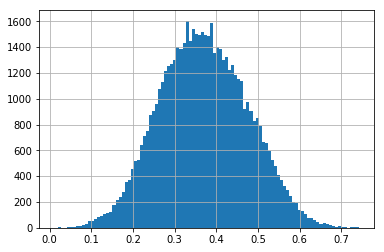

In [88]:
data.lang_ratio.hist(bins=100)
print("Mean:",data.lang_ratio.mean())
print("Std:", data.lang_ratio.std())

The data appears to roughly follow a bell-curve.

In [89]:
cutoff_ratio = 0.1
low_english_ratio = data.iloc[data.lang_ratio[data.lang_ratio < cutoff_ratio].index]
print("Number of songs with ratio lower than", cutoff_ratio, ":", len(low_english_ratio))

Number of songs with ratio lower than 0.1 : 161


In [90]:
low_english_ratio

,artist,song,link,text,token,clean,lang_ratio
359,Aiza Seguerra,Sa Ugoy Ng Duyan,/a/aiza+seguerra/sa+ugoy+ng+duyan_20795061.html,Sana'y di magmaliw ang dati kong araw \nNang ...,"[sanay, di, magmaliw, ang, dati, kong, araw, \...",sanay di magmaliw ang dati kong araw \n nang ...,0.096070
377,Alabama,Down By The Riverside,/a/alabama/down+by+the+riverside_20694789.html,"Gonna lay down my burdens, down by the riversi...","[gonna, lay, down, my, burdens, down, by, the,...",gonna lay down my burdens down by the riversi...,0.060317
753,Andy Williams,My Sweet Lord,/a/andy+williams/my+sweet+lord_20823287.html,"My sweet Lord \nHmm, my Lord \nHmm, my Lord ...","[my, sweet, lord, \n, hmm, my, lord, \n, hmm, ...",my sweet lord \n hmm my lord \n hmm my lor...,0.081395
1222,The Beatles,"Hello, Goodbye",/b/beatles/hello+goodbye_10026291.html,"You say ""Yes"", I say ""No"". \nYou say ""Stop"" a...","[you, say, yes, i, say, no, \n, you, say, stop...",you say yes i say no \n you say stop and...,0.096667
1251,Beautiful South,Pollard,/b/beautiful+south/pollard_20592270.html,You request pollard and you get pollard \nYou...,"[you, request, pollard, and, you, get, pollard...",you request pollard and you get pollard \n yo...,0.097222
2609,Chicago,Dialogue (Part 2),/c/chicago/dialogue+part+2_20962992.html,We can make it better \nWe can make it better...,"[we, can, make, it, better, \n, we, can, make,...",we can make it better \n we can make it bette...,0.064655
2680,Children,Bingo,/c/children/bingo_20590471.html,"There was a farmer had a dog, \nAnd Bingo was...","[there, was, a, farmer, had, a, dog, \n, and, ...",there was a farmer had a dog \n and bingo was...,0.065041
2681,Children,Birds In The Wilderness,/c/children/birds+in+the+wilderness_20590470.html,Here we sit like birds in the wilderness \nBi...,"[here, we, sit, like, birds, in, the, wilderne...",here we sit like birds in the wilderness \n b...,0.094675
2685,Children,Bought Me A Cat,/c/children/bought+me+a+cat_20590461.html,"Bought me a cat and the cat pleased me, \nI f...","[bought, me, a, cat, and, the, cat, pleased, m...",bought me a cat and the cat pleased me \n i f...,0.078014
2692,Children,Found A Peanut,/c/children/found+a+peanut_20652000.html,(To The Tune Of: Clementine) \n \nFound a pe...,"[to, the, tune, of, clementine, \n, \n, found,...",to the tune of clementine \n \n found a pe...,0.098361


In [94]:
low_english_ratio.clean[55793]

'loving you through it all  thick and thin  \n bad and good  sun and rain  and the sun  and the sun  and the rain  \n loving you through it all  rain and snow  \n thick and thin  sun and rain  rain and sun and rain  thick and thin  bad and \n good  \n bad and good  sun and rain  \n loving you  loving you  \n  \n loving you through it all  thick and thin  \n good and bad  sun and rain  rain and sun  good and bad  sun and rain  \n rain and sun  \n loving you through it all  loving you through it all  \n loving you through it all  loving you through it all  \n through it all  \n  \n loving you through it all  thick and thin  \n good and bad  sun and rain  good and bad  good and bad  \n loving you through it all  loving you through it all  \n thick and thin  bad and good  good and bad  sun and rain  \n loving you  loving you through it all  loving you  through it all  \n loving you till the end \n  \n '

# Spell correction on all songs

A new column in the dataset is made, with all songs having spell-correction run on their words.

In [96]:
spell = SpellChecker(distance=1)

print("Gathering tokens.")
text = data['token'].values
tokens = []
for song in text:
    tokens.extend(song)

print("Reduce to unique tokens only.")
tokens = list(set(tokens))

print("Get unknown token list.")
unknown = spell.unknown(tokens)

print("Get corrections.")
u_list = []
for u in unknown:
    correct = ((u, spell.correction(u)))
    if correct[0] != correct[1]:
        u_list.append(correct)

print("Remove duplicate corrections, create dictionary.")
# Remove possible duplicates
u_list = list(set(u_list))
u_dict = dict(u_list)

Gathering tokens.
Reduce to unique tokens only.
Get unknown token list.
Get corrections.
Remove duplicate corrections, create dictionary.


In [101]:
def replace_unknown(s_list):
    for i, s in enumerate(s_list):
        if s in u_dict:
            s_list[i] = u_dict[s]
    return s_list